In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)

In [4]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [27]:
application.iloc[:,30:60]

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE
0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383
1,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538
2,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.145570,0.681632,NaN,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.1008,0.0172
307507,2,2,MONDAY,8,0,0,0,0,0,0,XNA,NaN,0.115992,NaN,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,0.0202,0.0257,0.0000,0.0000,0.0252,0.0451
307508,3,3,THURSDAY,9,0,0,0,0,1,1,School,0.744026,0.535722,0.218859,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,0.0841,0.9279,0.0000,0.0000,0.1050,0.0894
307509,2,2,WEDNESDAY,9,0,0,0,1,1,0,Business Entity Type 1,NaN,0.514163,0.661024,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,NaN,0.0061,NaN,NaN,0.0126,NaN


In [8]:
cat = application.iloc[:,30:60].select_dtypes(include='object').columns
num = application.iloc[:,30:60].select_dtypes(exclude='object').columns
# print(num,"\n", cat)
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<5):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.iloc[:,30:60].select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE'],
      dtype='object') 
 Index(['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')


,REGION_RATING_CLIENT,COUNT,TARGET,DEFAULTER_RATES
0,2,226984,1,7.889102
1,3,48330,1,11.102835
2,1,32197,1,4.820325


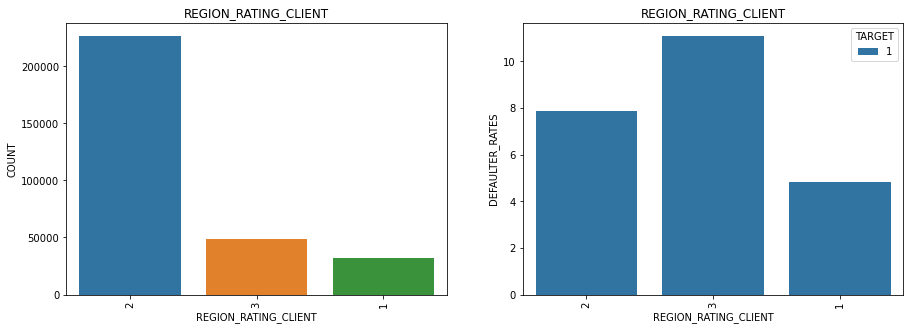

,REGION_RATING_CLIENT_W_CITY,COUNT,TARGET,DEFAULTER_RATES
0,2,229484,1,7.917763
1,3,43860,1,11.402189
2,1,34167,1,4.840928


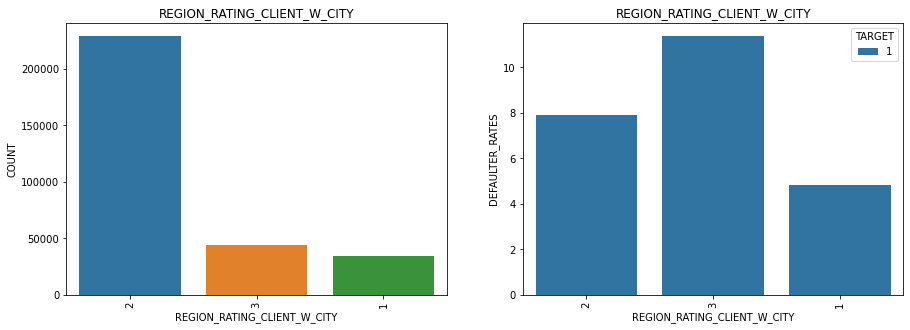

,WEEKDAY_APPR_PROCESS_START,COUNT,TARGET,DEFAULTER_RATES
0,TUESDAY,53901,1,8.350494
1,WEDNESDAY,51934,1,8.160357
2,MONDAY,50714,1,7.757227
3,THURSDAY,50591,1,8.100255
4,FRIDAY,50338,1,8.146927
5,SATURDAY,33852,1,7.887274
6,SUNDAY,16181,1,7.929053


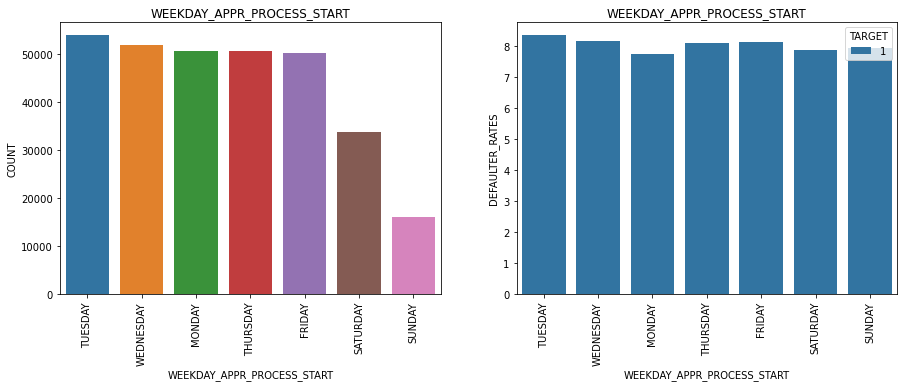

,REG_REGION_NOT_LIVE_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,302854,1,8.054046
1,1,4657,1,9.297831


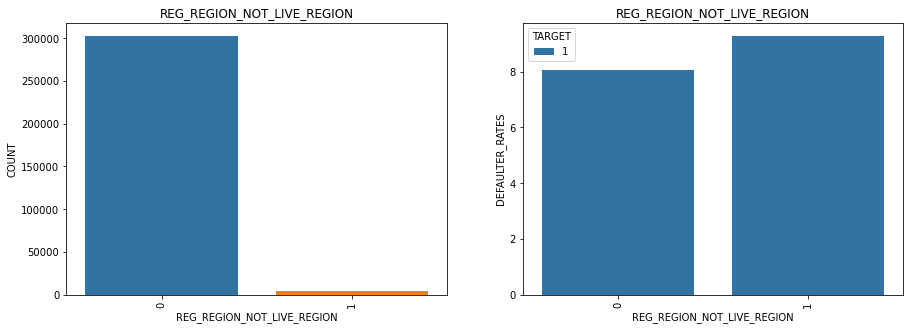

,REG_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,291899,1,8.029147
1,1,15612,1,8.890597


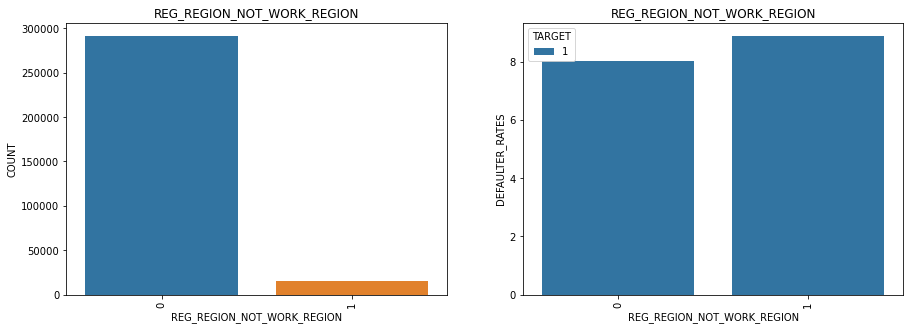

,LIVE_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,295008,1,8.057070
1,1,12503,1,8.445973


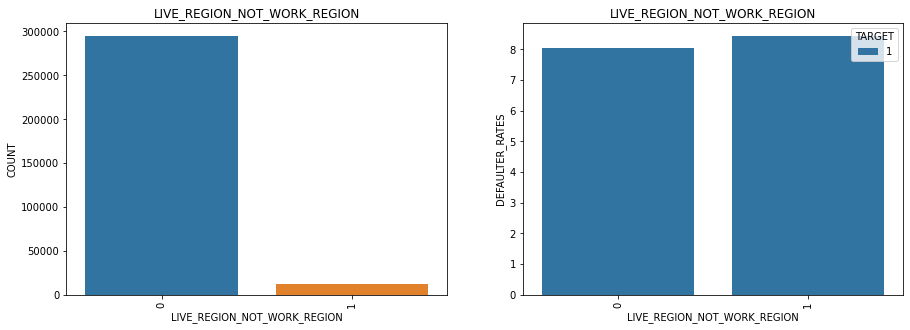

,REG_CITY_NOT_LIVE_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,283472,1,7.720692
1,1,24039,1,12.225966


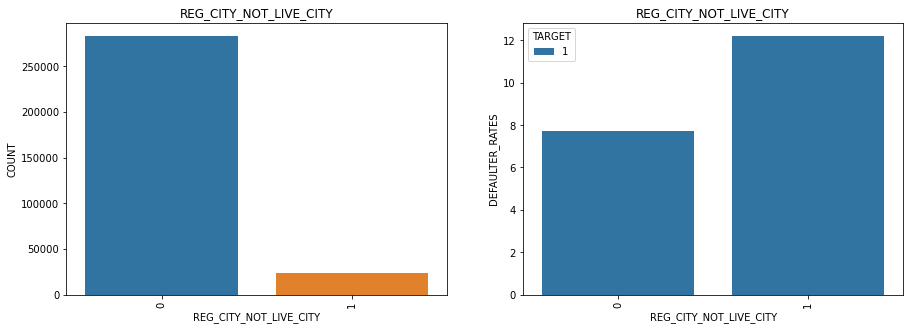

,REG_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,236644,1,7.312672
1,1,70867,1,10.611427


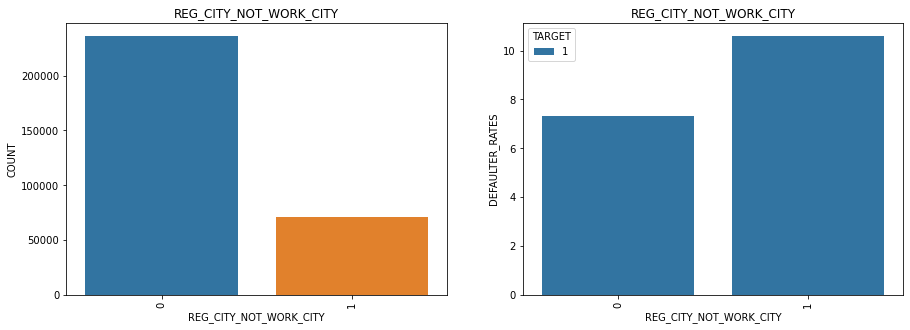

,LIVE_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,252296,1,7.658465
1,1,55215,1,9.966495


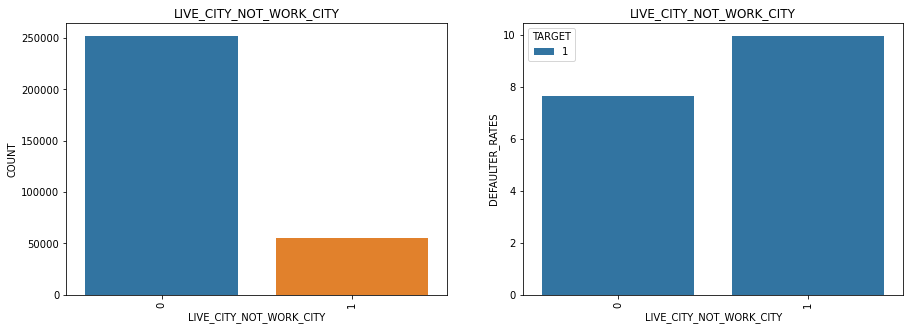

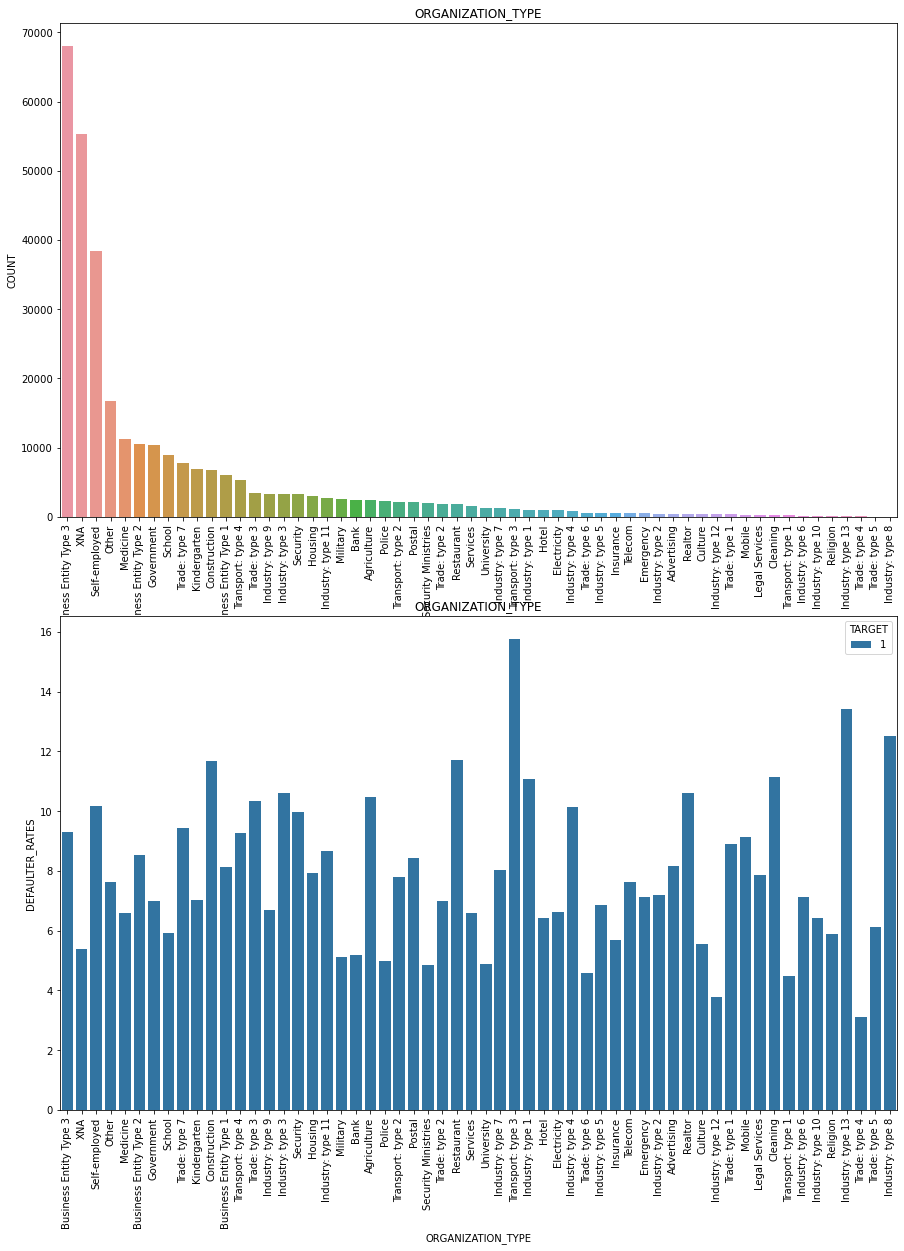

In [181]:
for col in cat:
    a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
    a = a.rename(columns={'SK_ID_CURR':'COUNT'})
    a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    if(len(a)>25):
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(2,1,figsize=(15,20))
    else:
        defaulter_rates = a.merge(a_target,on=col)
        display(defaulter_rates)
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=col,y="COUNT",data=a,order=a[col],ax=ax[0])
    sns.barplot(x=col,y="DEFAULTER_RATES",hue="TARGET",data=a_target,order=a[col],ax=ax[1])
#     plt.title(col)
    ax[0].set_title(col)
    ax[1].set_title(col)
    ax[0].tick_params(axis='x',rotation=90)
    ax[1].tick_params(axis='x',rotation=90)
    plt.show()

In [14]:
a = application.groupby(['OCCUPATION_TYPE']).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a_target = application.groupby(['OCCUPATION_TYPE',"TARGET"]).count()[['SK_ID_CURR']]
a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
defaulter_rates = a.merge(a_target,on='OCCUPATION_TYPE')
display(defaulter_rates)

,OCCUPATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Laborers,55186,1,10.578770
1,Sales staff,32102,1,9.631799
2,Core staff,27570,1,6.303954
3,Managers,21371,1,6.214028
4,Drivers,18603,1,11.326130
5,High skill tech staff,11380,1,6.159930
6,Accountants,9813,1,4.830327
7,Medicine staff,8537,1,6.700246
8,Security staff,6721,1,10.742449
9,Cooking staff,5946,1,10.443996


In [17]:
defaulter_rates[defaulter_rates['DEFAULTER_RATES']>7].sort_values('DEFAULTER_RATES',ascending=False)

,OCCUPATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
12,Low-skill Laborers,2093,1,17.152413
4,Drivers,18603,1,11.326130
13,Waiters/barmen staff,1348,1,11.275964
8,Security staff,6721,1,10.742449
0,Laborers,55186,1,10.578770
9,Cooking staff,5946,1,10.443996
1,Sales staff,32102,1,9.631799
10,Cleaning staff,4653,1,9.606705
15,Realty agents,751,1,7.856192
14,Secretaries,1305,1,7.049808


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Low-skill Laborers'),
  Text(1, 0, 'Drivers'),
  Text(2, 0, 'Waiters/barmen staff'),
  Text(3, 0, 'Security staff'),
  Text(4, 0, 'Laborers'),
  Text(5, 0, 'Cooking staff')])

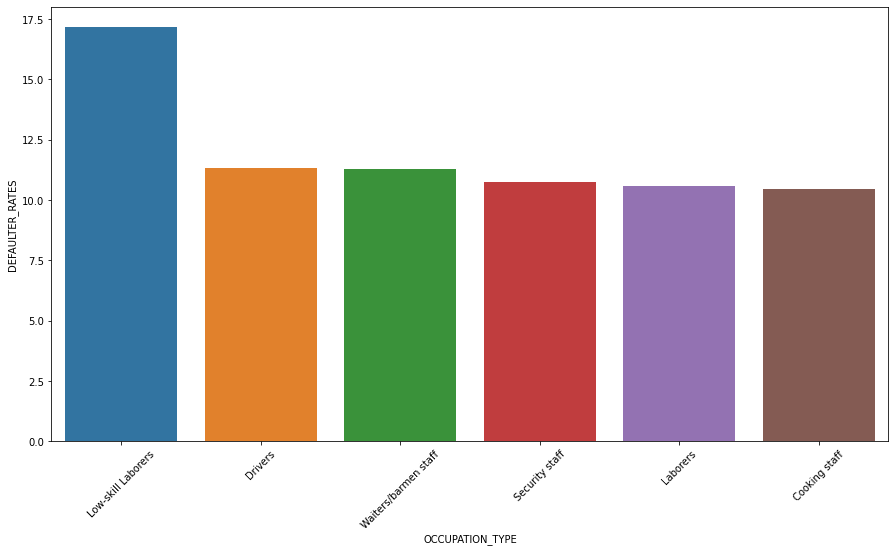

In [19]:
plt.figure(figsize=(15,8))
sns.barplot(x='OCCUPATION_TYPE',y='DEFAULTER_RATES',data=defaulter_rates[defaulter_rates['DEFAULTER_RATES']>10].sort_values('DEFAULTER_RATES',ascending=False))
plt.xticks(rotation=45)

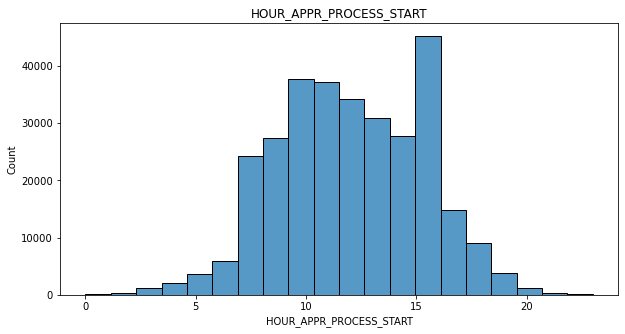

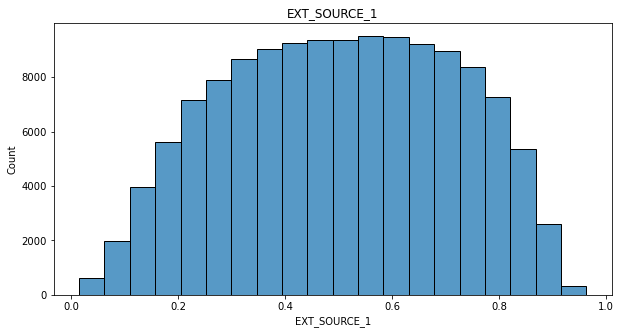

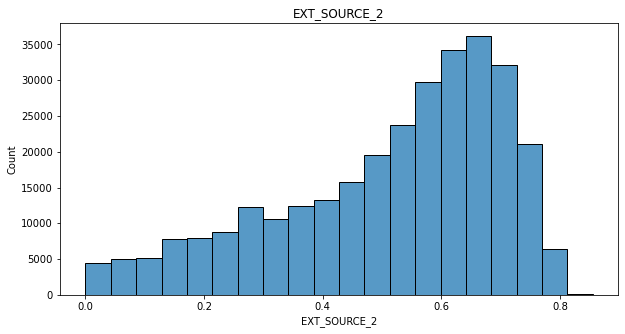

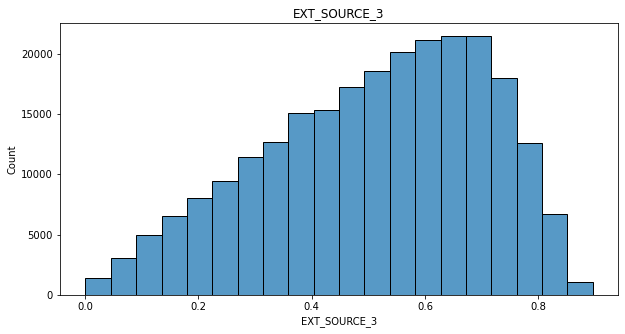

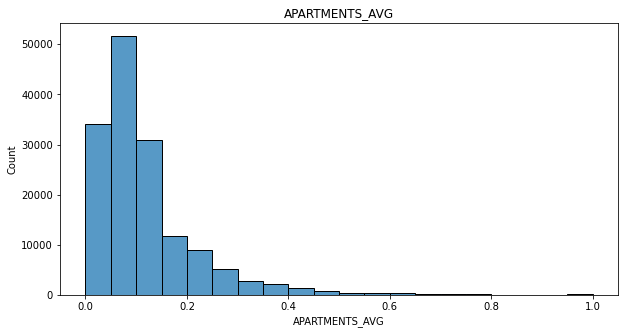

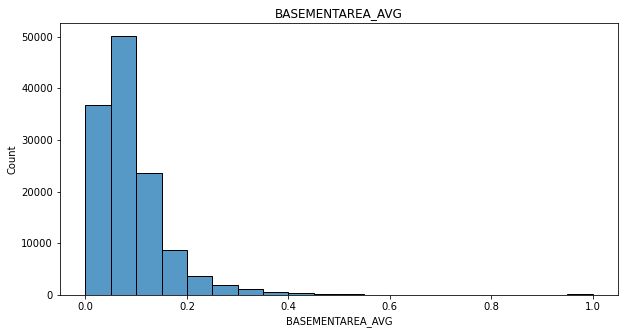

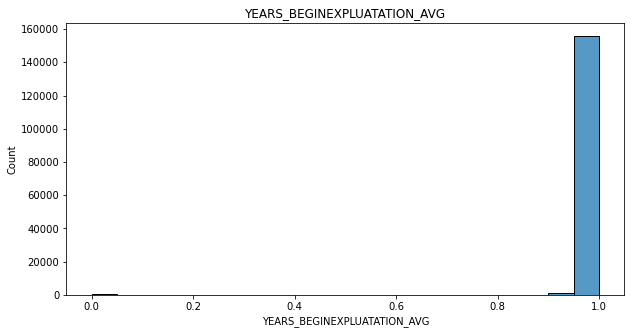

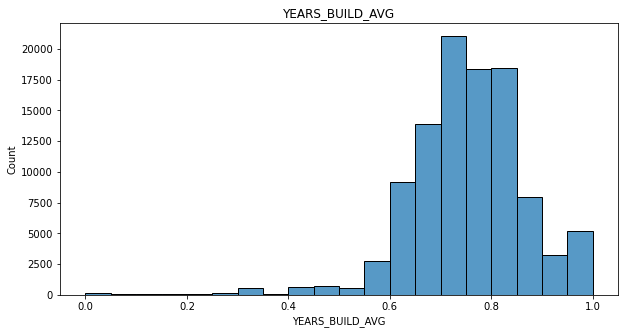

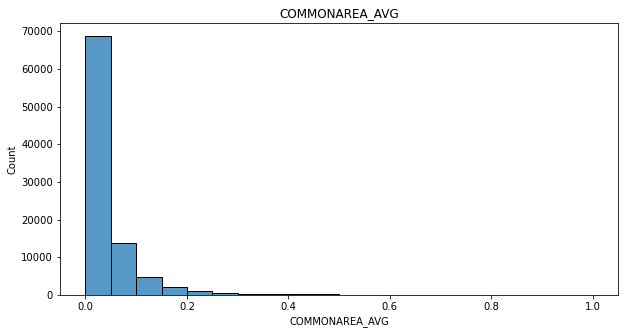

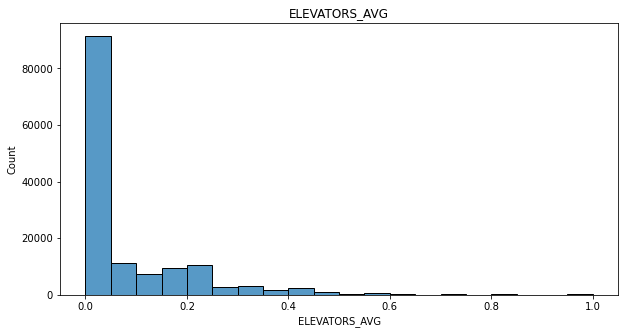

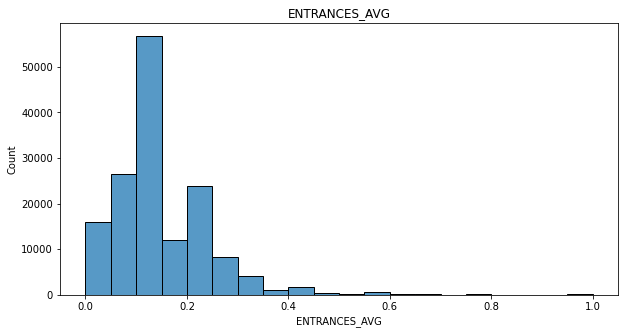

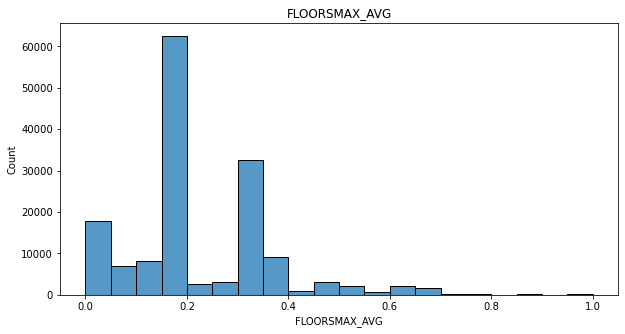

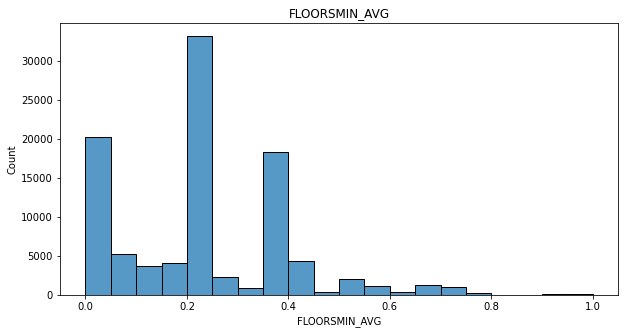

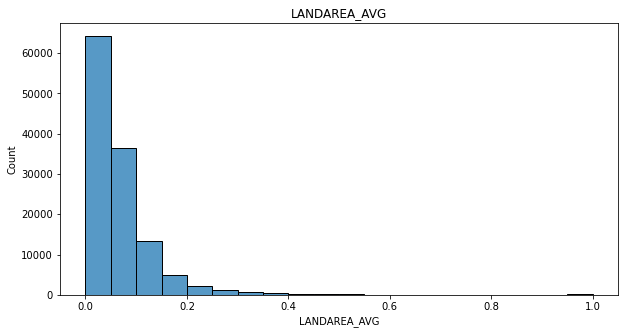

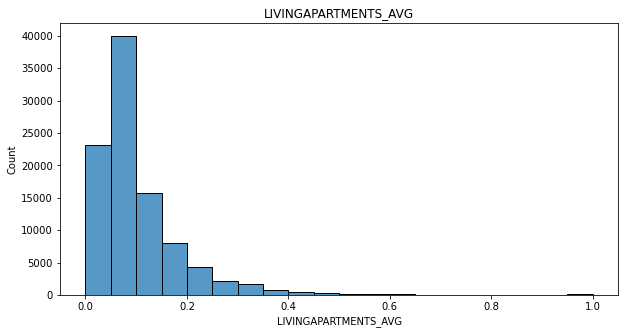

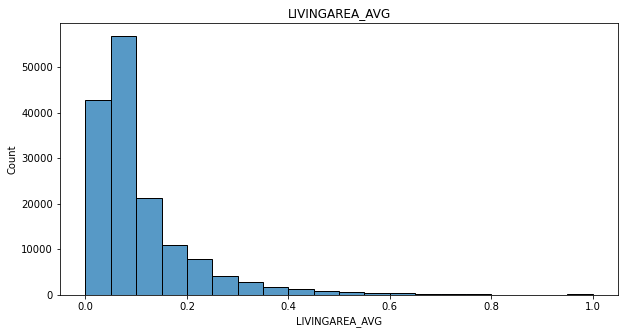

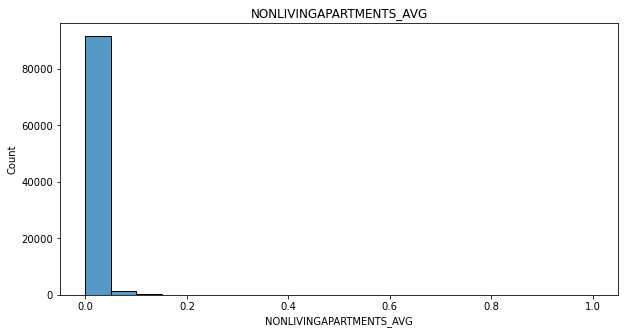

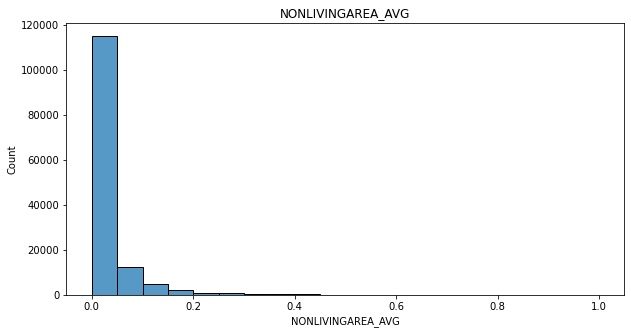

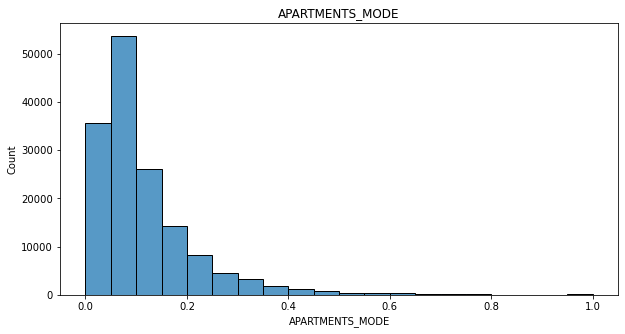

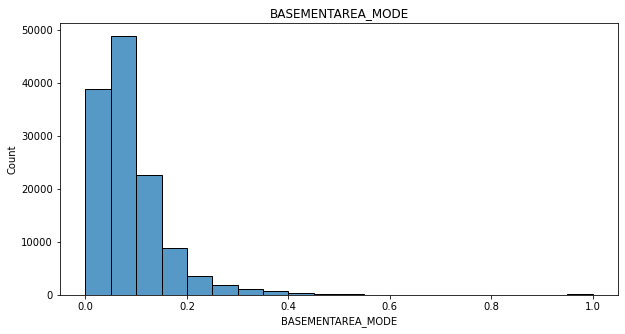

In [216]:
for col in num:
    plt.figure(figsize=(10,5))
    sns.histplot(application[col],bins=20)
    plt.title(col)
    plt.show()

In [220]:
application['EXT_SOURCE_1'].describe()

count    134133.000000
mean          0.502130
std           0.211062
min           0.014568
25%           0.334007
50%           0.505998
75%           0.675053
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [226]:
q_bins = pd.DataFrame(pd.qcut(application['EXT_SOURCE_1'] , q=4))
q_bins.value_counts()

EXT_SOURCE_1                 
(0.334, 0.506]                   33534
(0.013600000000000001, 0.334]    33534
(0.675, 0.963]                   33533
(0.506, 0.675]                   33532
dtype: int64

In [227]:
num

Index(['HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE'],
      dtype='object')

,qbins,TARGET,DEFAULTER_RATES
1,"(0.013600000000000001, 0.334]",1,13.559373
3,"(0.334, 0.506]",1,7.771217
5,"(0.506, 0.675]",1,5.379936
7,"(0.675, 0.963]",1,3.271404


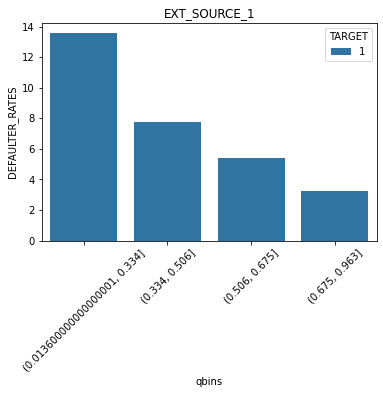

,qbins,TARGET,DEFAULTER_RATES
1,"(-0.0009999183, 0.392]",1,14.294280
3,"(0.392, 0.566]",1,8.174945
5,"(0.566, 0.664]",1,6.019840
7,"(0.664, 0.855]",1,3.803838


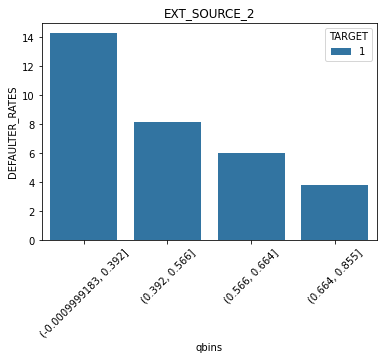

,qbins,TARGET,DEFAULTER_RATES
1,"(-0.000473, 0.371]",1,15.056539
3,"(0.371, 0.535]",1,7.510100
5,"(0.535, 0.669]",1,4.913313
7,"(0.669, 0.896]",1,3.523471


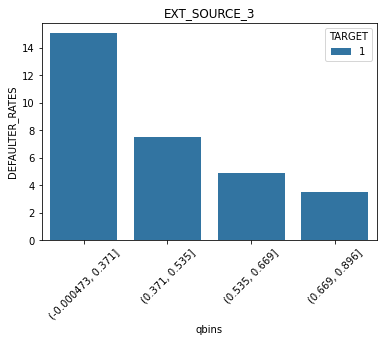

,qbins,TARGET,DEFAULTER_RATES
1,"(-0.001, 0.0577]",1,8.417324
3,"(0.0577, 0.0876]",1,6.805839
5,"(0.0876, 0.148]",1,6.579868
7,"(0.148, 1.0]",1,5.967696


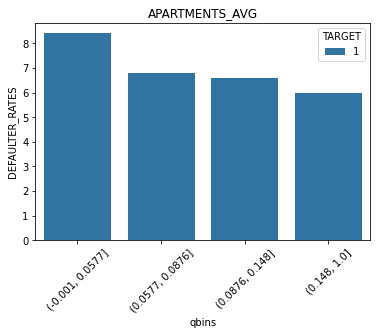

In [10]:
for col in ['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3', 'APARTMENTS_AVG']:
    application['qbins'] = pd.qcut(application[col] , q=4)
    a_target = application.groupby(['qbins',"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    display(a_target)
    sns.barplot(x='qbins',y="DEFAULTER_RATES",hue='TARGET',data=a_target,order=a_target['qbins'])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
sim_group=sim_df.groupby(by="SK_ID_CURR",sort=True)
#creating simlar column in consideration
similar_list=["SK_ID_PREV","NAME_CONTRACT_TYPE_y","AMT_CREDIT_y","AMT_ANNUITY_y","AMT_GOODS_PRICE_y","NAME_TYPE_SUITE_y","WEEKDAY_APPR_PROCESS_START_y","HOUR_APPR_PROCESS_START_y"]
sim_df_list=pd.DataFrame()

for column in similar_list:
  sim_df_list[column[:len(column)-1]+"list"]=sim_group[column].apply(list)

display(sim_df_list.head(5))

### All Columns

In [6]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

,NAME_CONTRACT_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Cash loans,278232,1,8.345913
1,Revolving loans,29279,1,5.478329


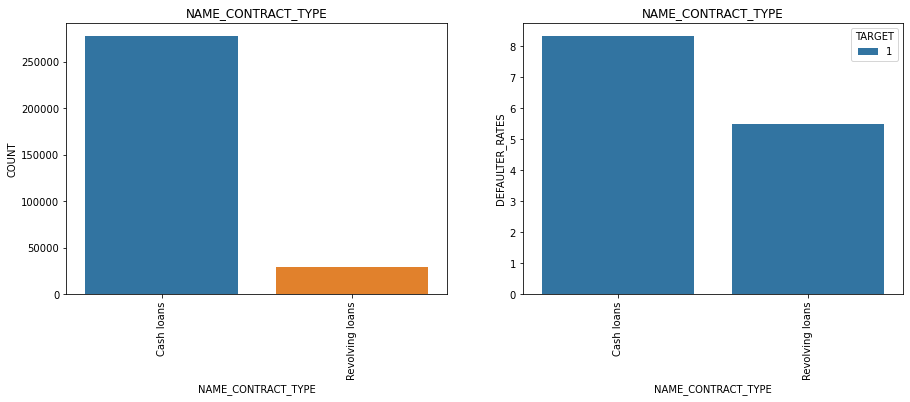

,CODE_GENDER,COUNT,TARGET,DEFAULTER_RATES
0,F,202448,1,6.999328
1,M,105059,1,10.141920


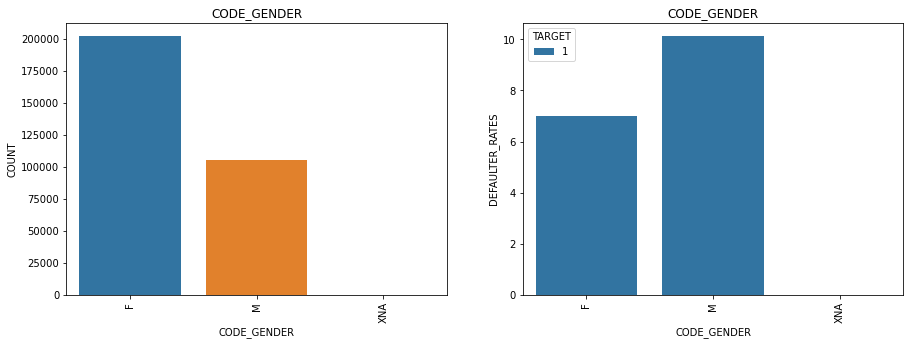

,FLAG_OWN_CAR,COUNT,TARGET,DEFAULTER_RATES
0,N,202924,1,8.500227
1,Y,104587,1,7.243730


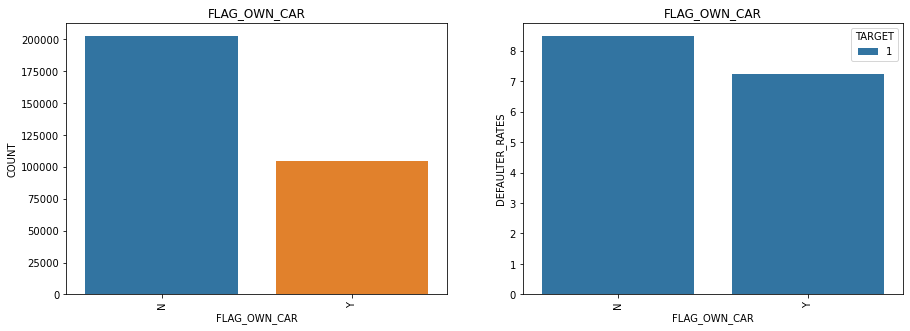

,FLAG_OWN_REALTY,COUNT,TARGET,DEFAULTER_RATES
0,Y,213312,1,7.961577
1,N,94199,1,8.324929


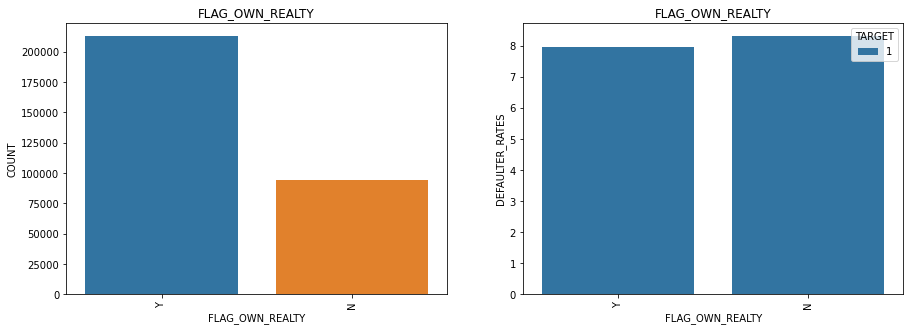

,CNT_CHILDREN,COUNT,TARGET,DEFAULTER_RATES
0,0,215371,1,7.711809
1,1,61119,1,8.923575
2,2,26749,1,8.721821
3,3,3717,1,9.631423
4,4,429,1,12.820513
5,5,84,1,8.333333
6,6,21,1,28.571429
7,9,2,1,100.000000
8,11,1,1,100.000000


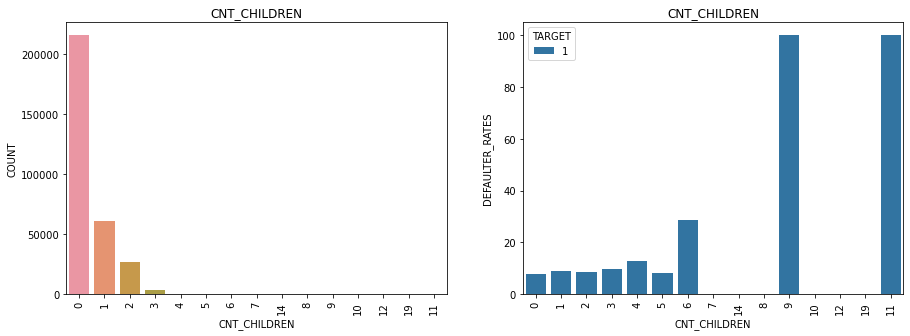

,NAME_TYPE_SUITE,COUNT,TARGET,DEFAULTER_RATES
0,Unaccompanied,248526,1,8.183047
1,Family,40149,1,7.494583
2,"Spouse, partner",11370,1,7.871592
3,Children,3267,1,7.376798
4,Other_B,1770,1,9.830508
5,Other_A,866,1,8.775982
6,Group of people,271,1,8.487085


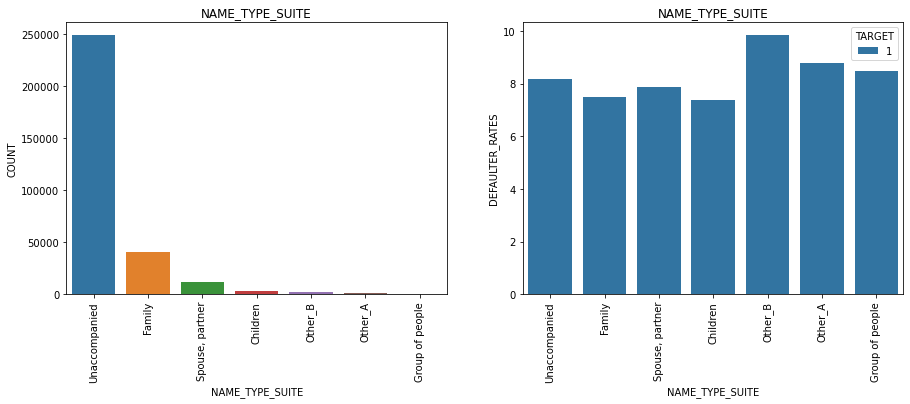

,NAME_INCOME_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Working,158774,1,9.588472
1,Commercial associate,71617,1,7.484257
2,Pensioner,55362,1,5.386366
3,State servant,21703,1,5.754965
4,Unemployed,22,1,36.363636
5,Maternity leave,5,1,40.000000


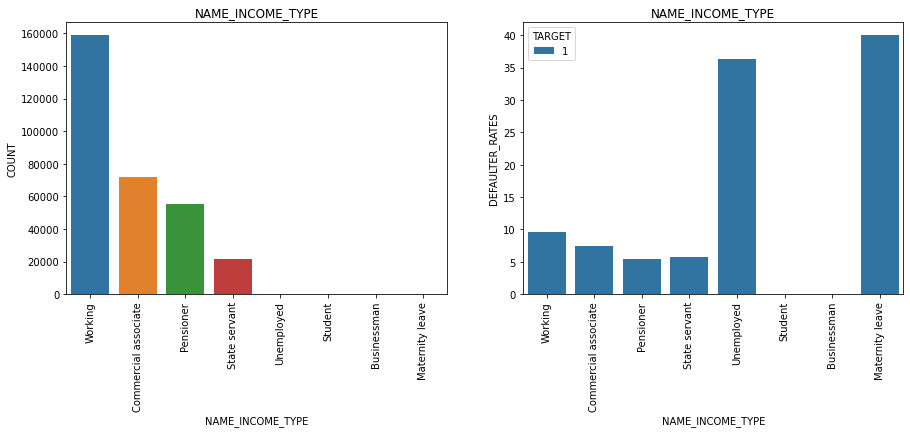

,NAME_EDUCATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Secondary / secondary special,218391,1,8.939929
1,Higher education,74863,1,5.355115
2,Incomplete higher,10277,1,8.484966
3,Lower secondary,3816,1,10.927673
4,Academic degree,164,1,1.829268


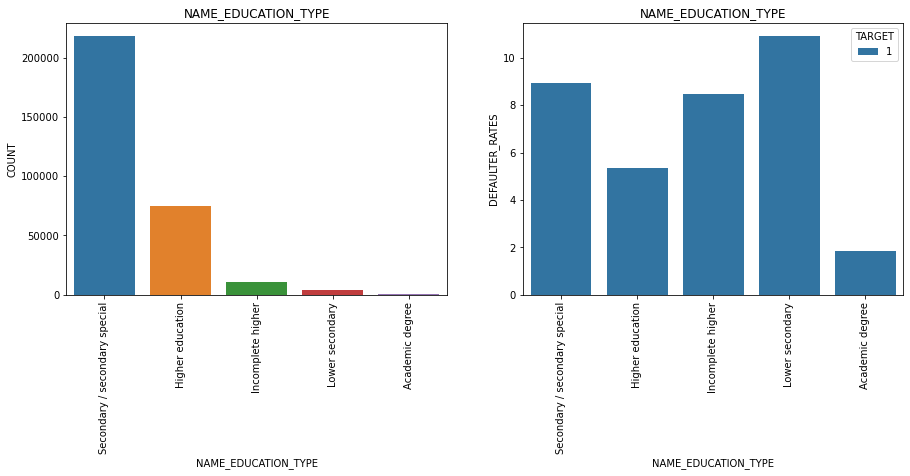

,NAME_FAMILY_STATUS,COUNT,TARGET,DEFAULTER_RATES
0,Married,196432,1,7.559868
1,Single / not married,45444,1,9.807675
2,Civil marriage,29775,1,9.944584
3,Separated,19770,1,8.194234
4,Widow,16088,1,5.824217


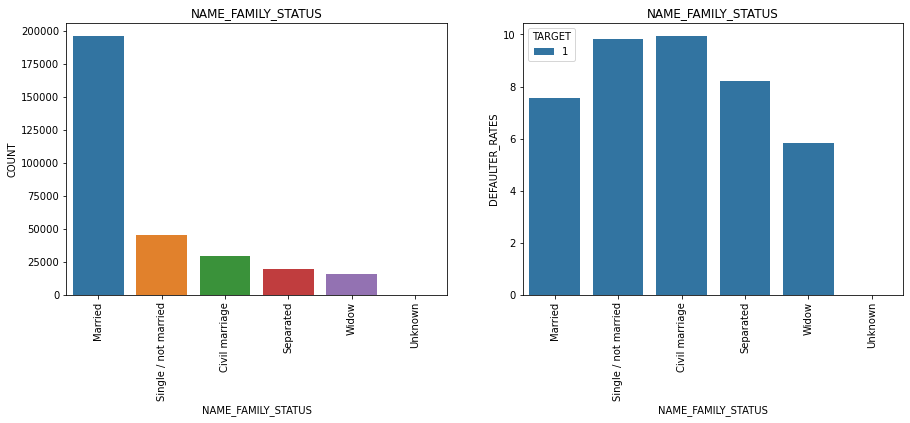

,NAME_HOUSING_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,House / apartment,272868,1,7.795711
1,With parents,14840,1,11.698113
2,Municipal apartment,11183,1,8.539748
3,Rented apartment,4881,1,12.313051
4,Office apartment,2617,1,6.572411
5,Co-op apartment,1122,1,7.932264


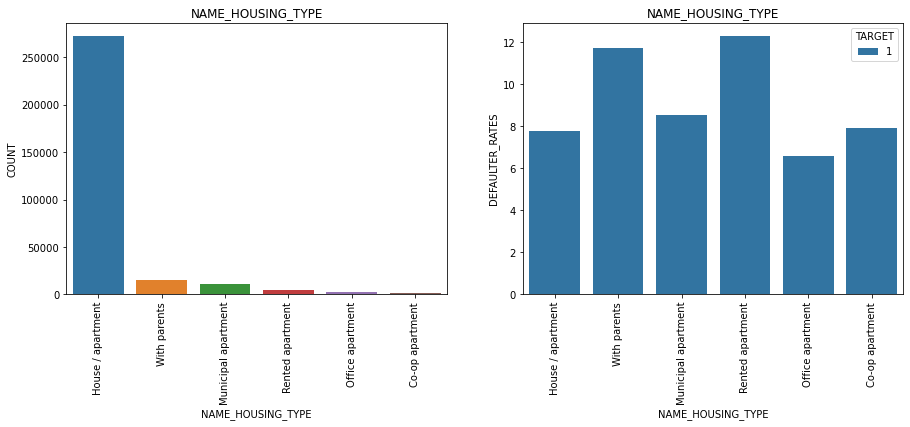

,FLAG_MOBIL,COUNT,TARGET,DEFAULTER_RATES
0,1,307510,1,8.072908


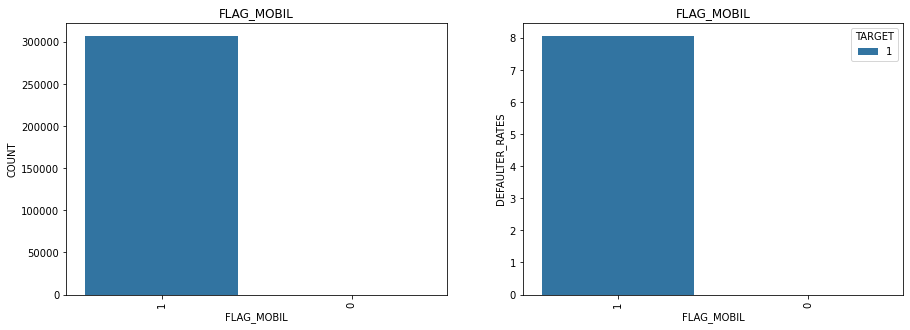

,FLAG_EMP_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,1,252125,1,8.659990
1,0,55386,1,5.400282


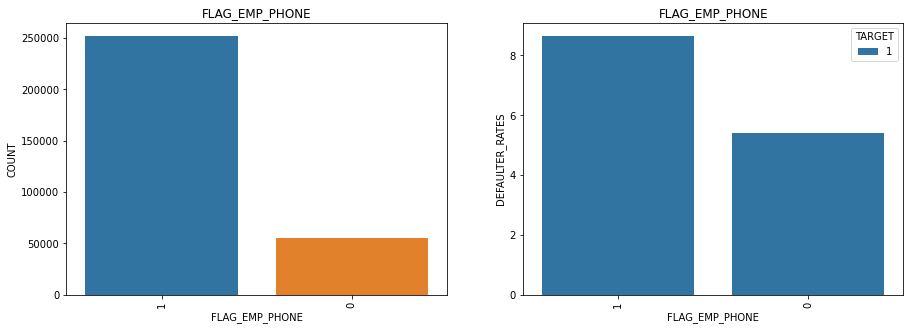

,FLAG_WORK_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,0,246203,1,7.685122
1,1,61308,1,9.630065


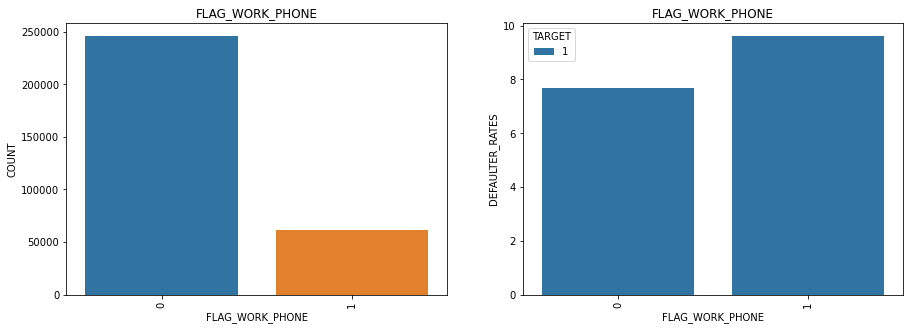

,FLAG_CONT_MOBILE,COUNT,TARGET,DEFAULTER_RATES
0,1,306937,1,8.073318
1,0,574,1,7.839721


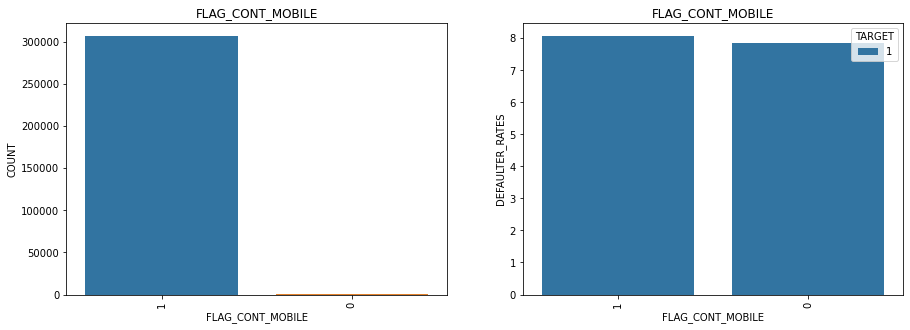

,FLAG_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,0,221080,1,8.478379
1,1,86431,1,7.035670


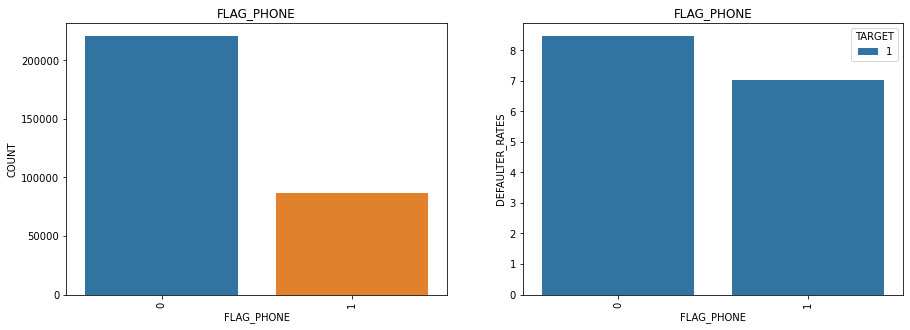

,FLAG_EMAIL,COUNT,TARGET,DEFAULTER_RATES
0,0,290069,1,8.084628
1,1,17442,1,7.877537


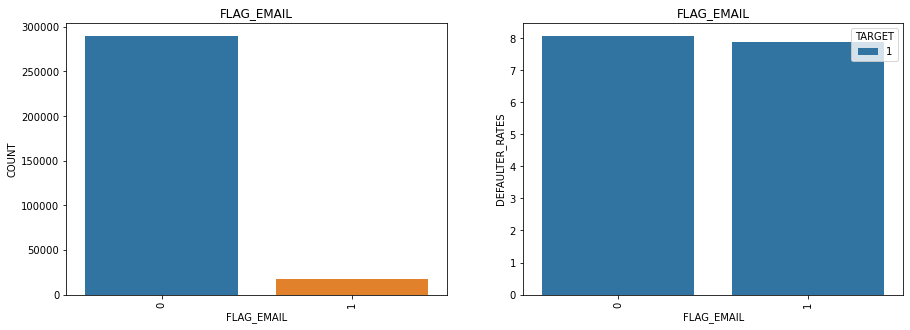

,OCCUPATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Laborers,55186,1,10.578770
1,Sales staff,32102,1,9.631799
2,Core staff,27570,1,6.303954
3,Managers,21371,1,6.214028
4,Drivers,18603,1,11.326130
5,High skill tech staff,11380,1,6.159930
6,Accountants,9813,1,4.830327
7,Medicine staff,8537,1,6.700246
8,Security staff,6721,1,10.742449
9,Cooking staff,5946,1,10.443996


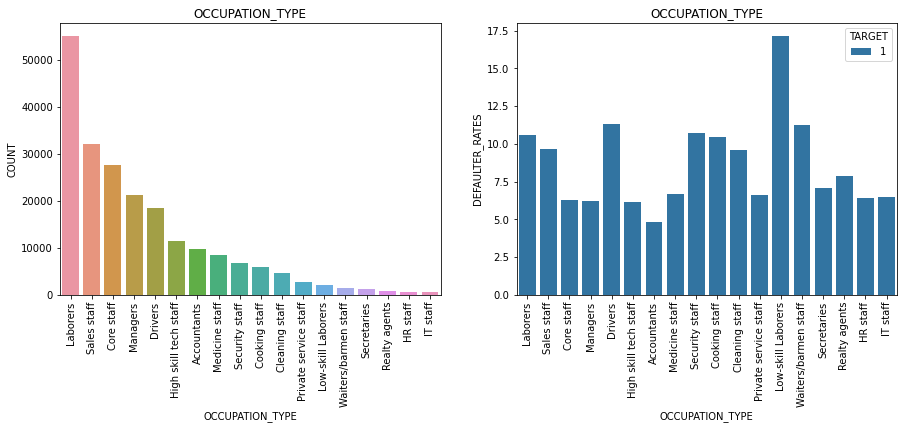

,CNT_FAM_MEMBERS,COUNT,TARGET,DEFAULTER_RATES
0,2.0,158357,1,7.583498
1,1.0,67847,1,8.364408
2,3.0,52601,1,8.760290
3,4.0,24697,1,8.648824
4,5.0,3478,1,9.401955
5,6.0,408,1,13.480392
6,7.0,81,1,7.407407
7,8.0,20,1,30.000000
8,10.0,3,1,33.333333
9,11.0,1,1,100.000000


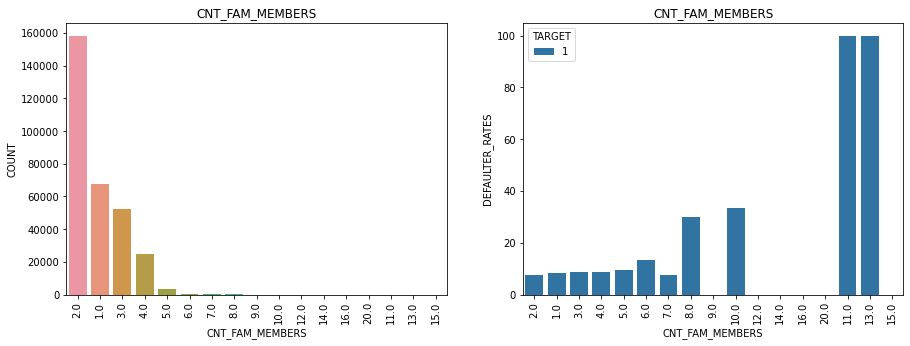

,REGION_RATING_CLIENT,COUNT,TARGET,DEFAULTER_RATES
0,2,226984,1,7.889102
1,3,48330,1,11.102835
2,1,32197,1,4.820325


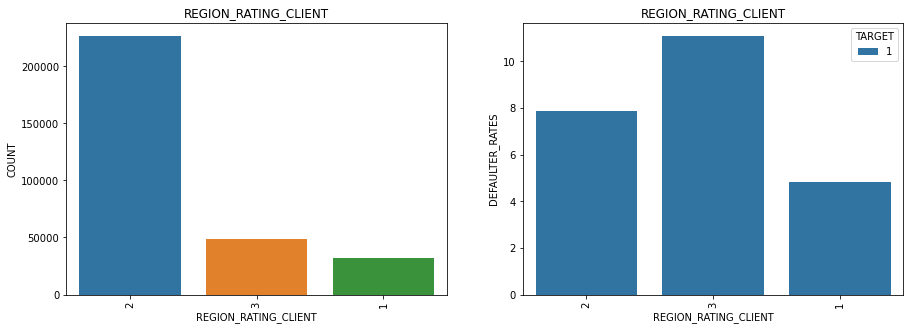

,REGION_RATING_CLIENT_W_CITY,COUNT,TARGET,DEFAULTER_RATES
0,2,229484,1,7.917763
1,3,43860,1,11.402189
2,1,34167,1,4.840928


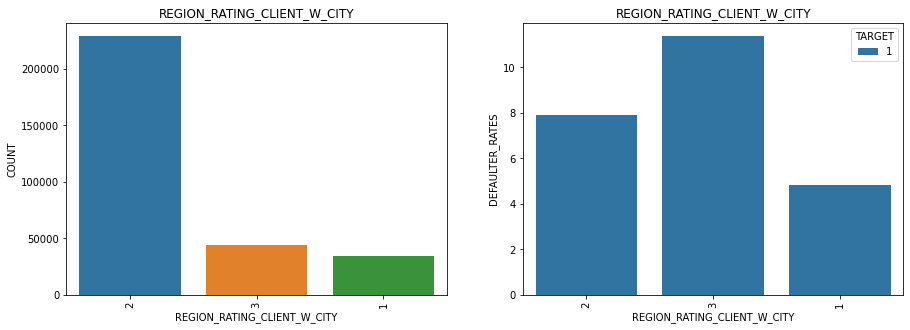

,WEEKDAY_APPR_PROCESS_START,COUNT,TARGET,DEFAULTER_RATES
0,TUESDAY,53901,1,8.350494
1,WEDNESDAY,51934,1,8.160357
2,MONDAY,50714,1,7.757227
3,THURSDAY,50591,1,8.100255
4,FRIDAY,50338,1,8.146927
5,SATURDAY,33852,1,7.887274
6,SUNDAY,16181,1,7.929053


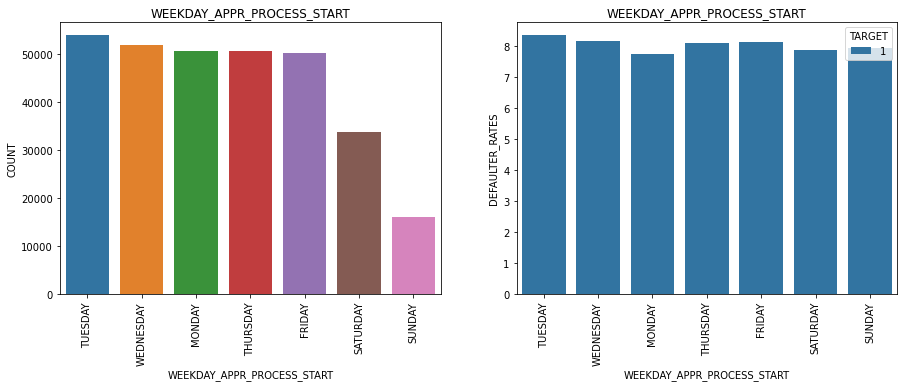

,REG_REGION_NOT_LIVE_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,302854,1,8.054046
1,1,4657,1,9.297831


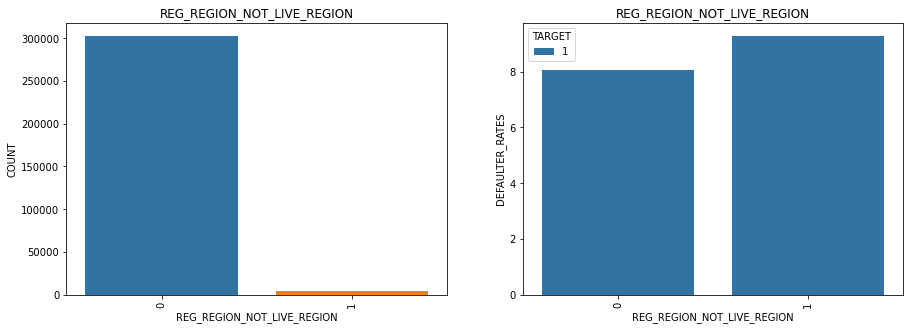

,REG_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,291899,1,8.029147
1,1,15612,1,8.890597


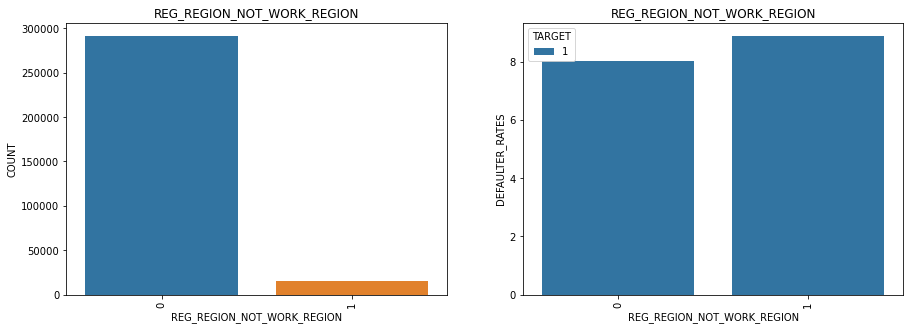

,LIVE_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,295008,1,8.057070
1,1,12503,1,8.445973


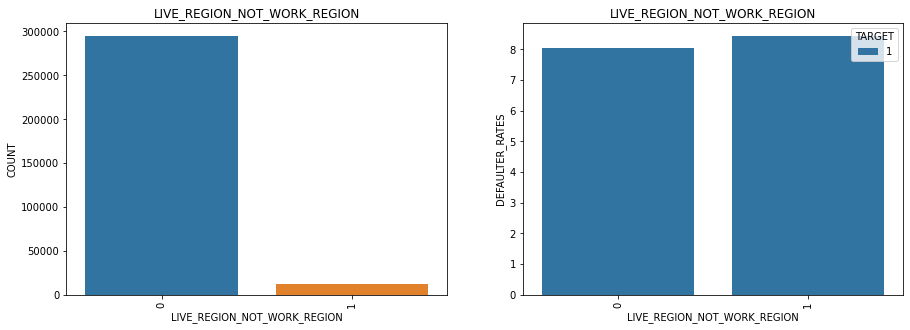

,REG_CITY_NOT_LIVE_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,283472,1,7.720692
1,1,24039,1,12.225966


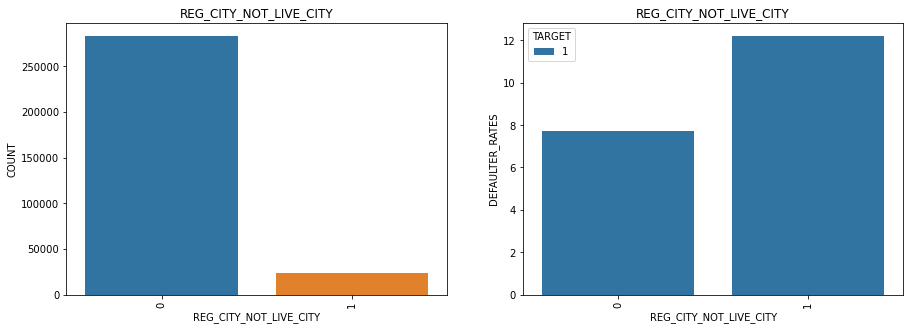

,REG_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,236644,1,7.312672
1,1,70867,1,10.611427


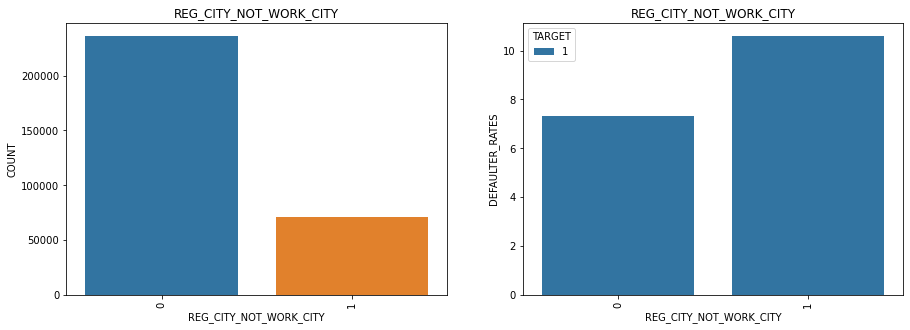

,LIVE_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,252296,1,7.658465
1,1,55215,1,9.966495


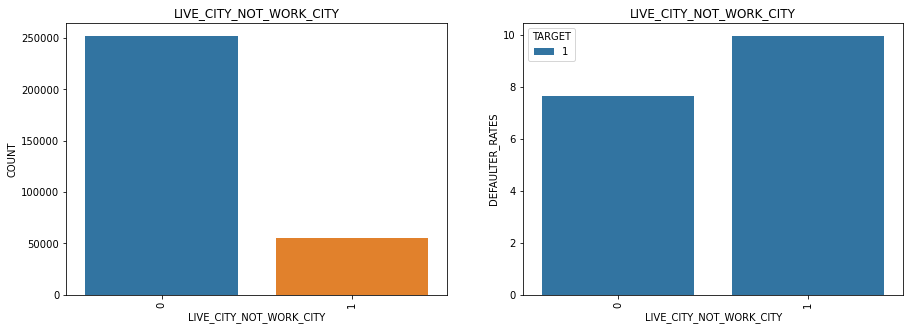

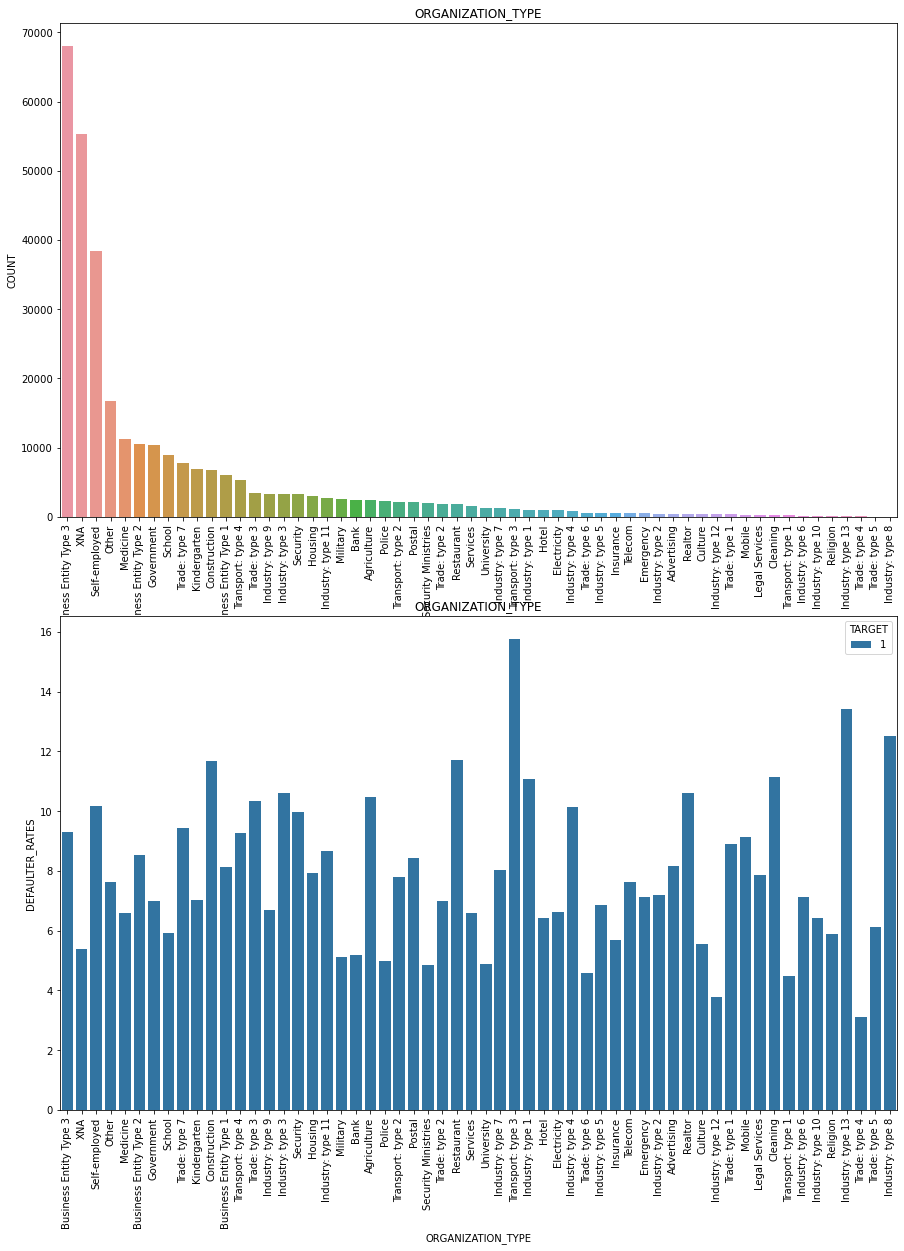

,FONDKAPREMONT_MODE,COUNT,TARGET,DEFAULTER_RATES
0,reg oper account,73830,1,6.978193
1,reg oper spec account,12080,1,6.556291
2,not specified,5687,1,7.543520
3,org spec account,5619,1,5.819541


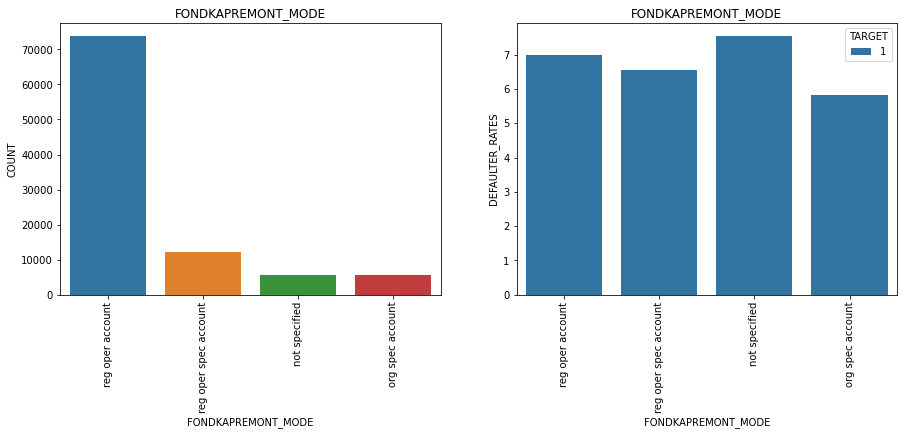

,HOUSETYPE_MODE,COUNT,TARGET,DEFAULTER_RATES
0,block of flats,150503,1,6.943383
1,specific housing,1499,1,10.140093
2,terraced house,1212,1,8.498350


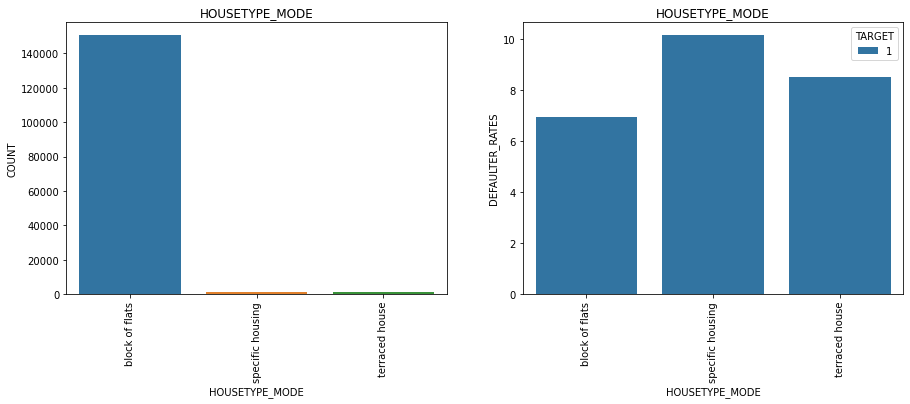

,WALLSMATERIAL_MODE,COUNT,TARGET,DEFAULTER_RATES
0,Panel,66040,1,6.347668
1,"Stone, brick",64815,1,7.405693
2,Block,9253,1,7.024749
3,Wooden,5362,1,9.697874
4,Mixed,2296,1,7.534843
5,Monolithic,1779,1,4.721754
6,Others,1625,1,8.307692


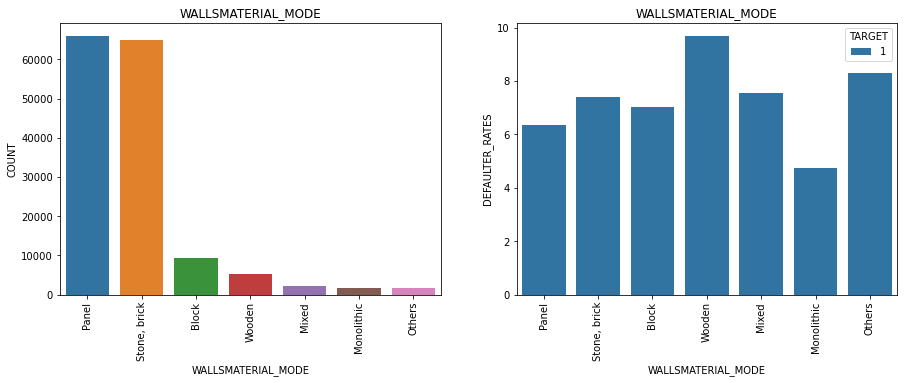

,EMERGENCYSTATE_MODE,COUNT,TARGET,DEFAULTER_RATES
0,No,159428,1,6.964900
1,Yes,2328,1,9.579038


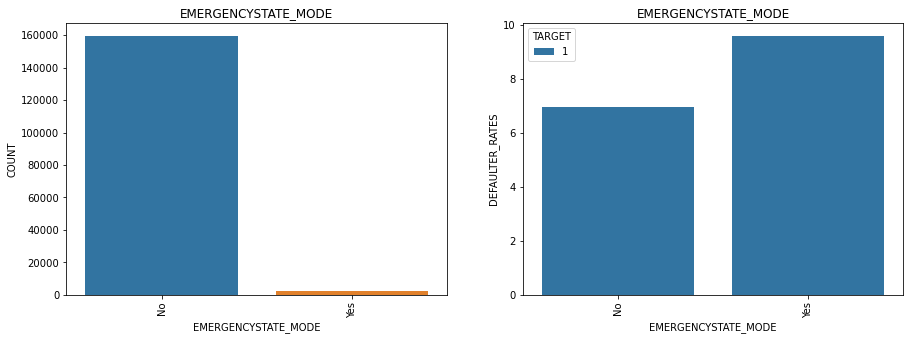

,DEF_30_CNT_SOCIAL_CIRCLE,COUNT,TARGET,DEFAULTER_RATES
0,0.0,271324,1,7.775943
1,1.0,28328,1,10.145439
2,2.0,5323,1,11.647567
3,3.0,1192,1,12.835570
4,4.0,253,1,13.833992
5,5.0,56,1,14.285714
6,6.0,11,1,9.090909


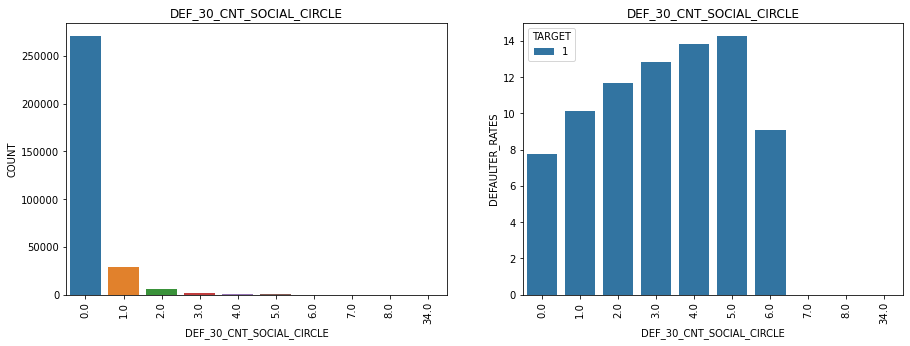

,DEF_60_CNT_SOCIAL_CIRCLE,COUNT,TARGET,DEFAULTER_RATES
0,0.0,280721,1,7.834825
1,1.0,21841,1,10.516918
2,2.0,3170,1,12.145110
3,3.0,598,1,15.886288
4,4.0,135,1,11.111111
5,5.0,20,1,15.000000


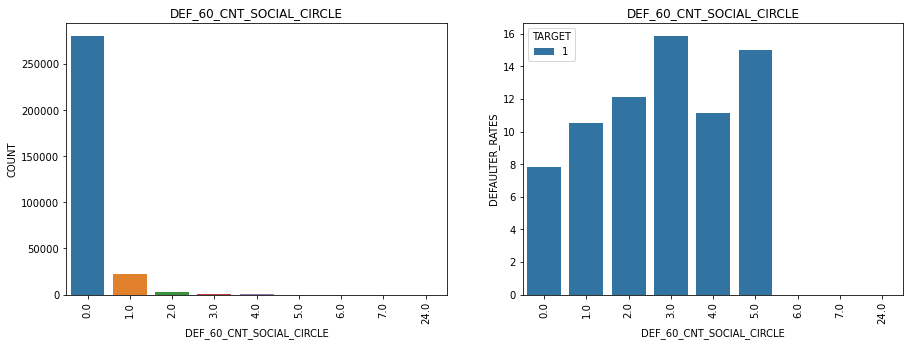

,FLAG_DOCUMENT_2,COUNT,TARGET,DEFAULTER_RATES
0,0,307498,1,8.071922
1,1,13,1,30.769231


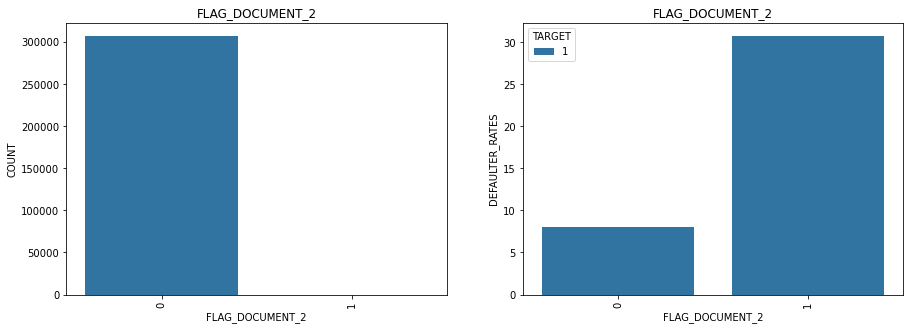

,FLAG_DOCUMENT_3,COUNT,TARGET,DEFAULTER_RATES
0,1,218340,1,8.844921
1,0,89171,1,6.182503


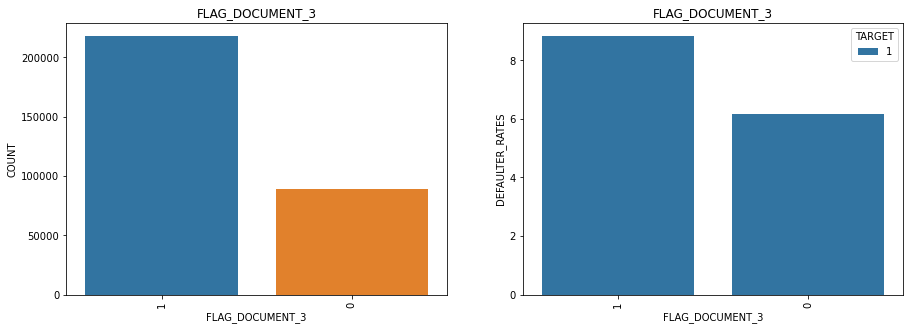

,FLAG_DOCUMENT_4,COUNT,TARGET,DEFAULTER_RATES
0,0,307486,1,8.073538


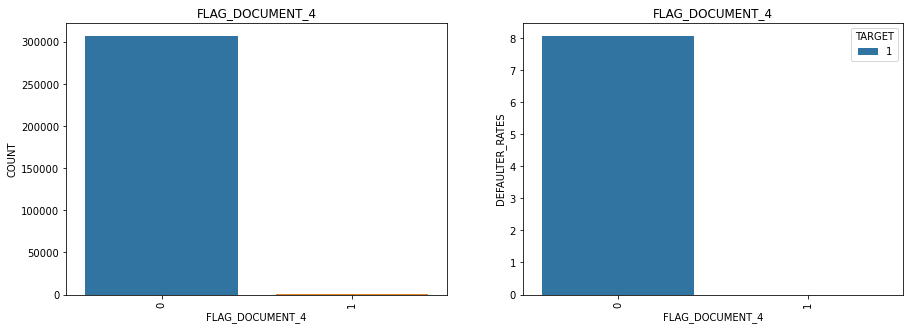

,FLAG_DOCUMENT_5,COUNT,TARGET,DEFAULTER_RATES
0,0,302863,1,8.073948
1,1,4648,1,8.003442


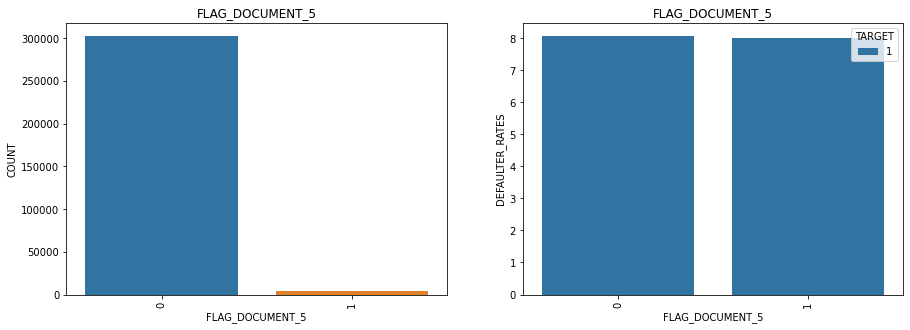

,FLAG_DOCUMENT_6,COUNT,TARGET,DEFAULTER_RATES
0,0,280433,1,8.314999
1,1,27078,1,5.565404


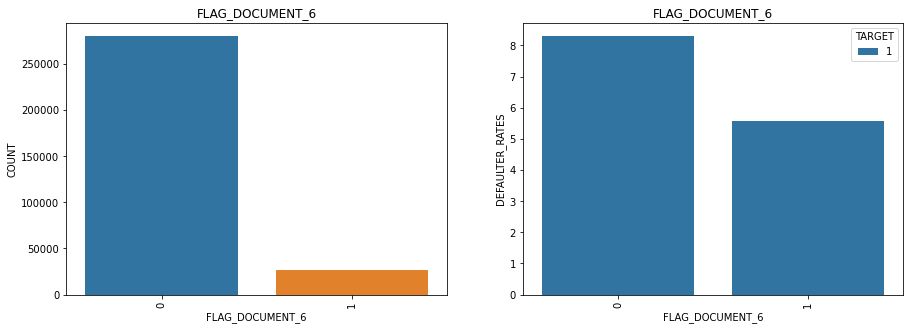

,FLAG_DOCUMENT_7,COUNT,TARGET,DEFAULTER_RATES
0,0,307452,1,8.073455
1,1,59,1,5.084746


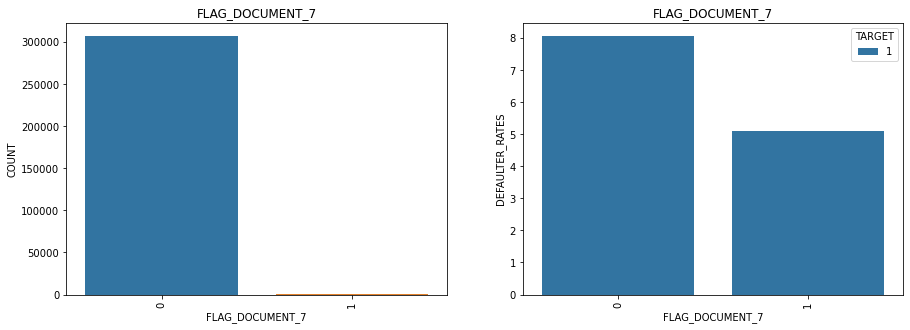

,FLAG_DOCUMENT_8,COUNT,TARGET,DEFAULTER_RATES
0,0,282487,1,8.138074
1,1,25024,1,7.336957


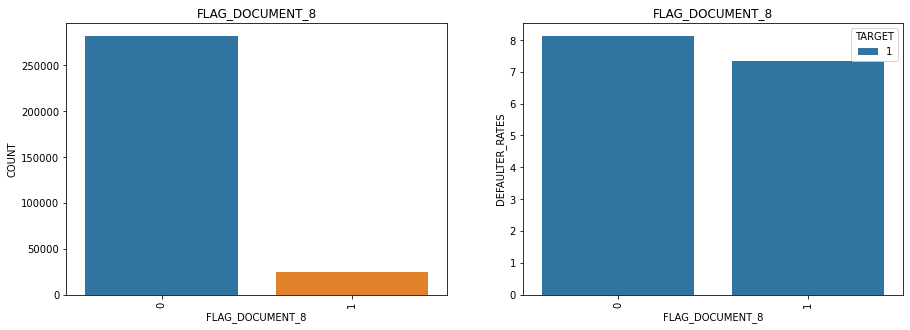

,FLAG_DOCUMENT_9,COUNT,TARGET,DEFAULTER_RATES
0,0,306313,1,8.080297
1,1,1198,1,6.176962


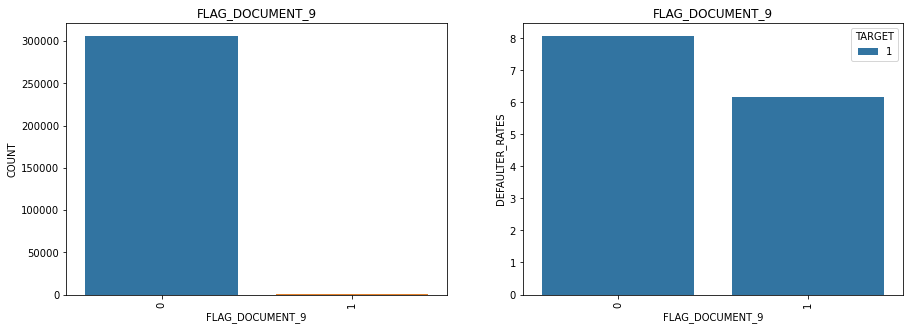

,FLAG_DOCUMENT_10,COUNT,TARGET,DEFAULTER_RATES
0,0,307504,1,8.073066


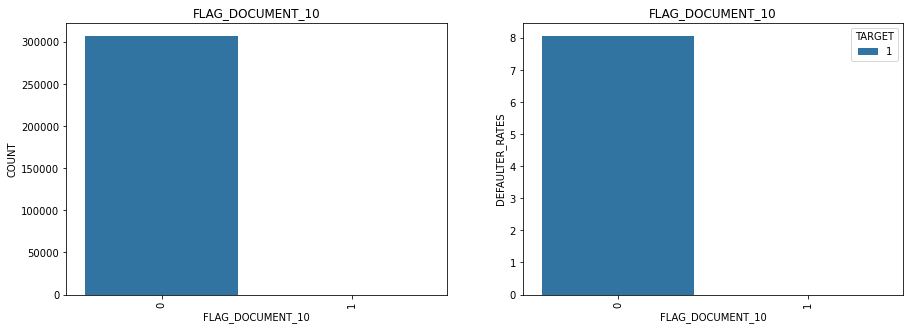

,FLAG_DOCUMENT_11,COUNT,TARGET,DEFAULTER_RATES
0,0,306308,1,8.080102
1,1,1203,1,6.234414


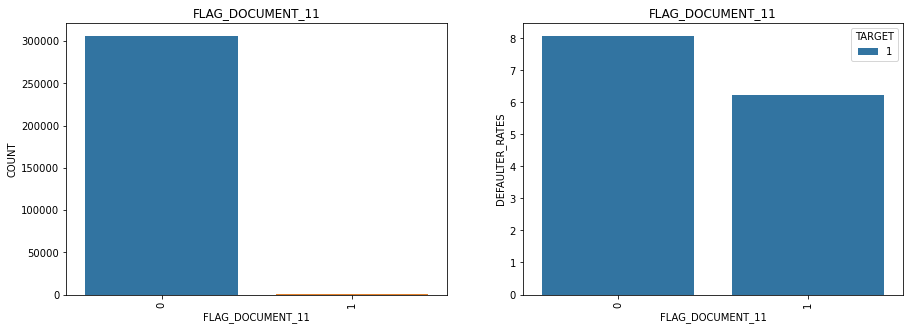

,FLAG_DOCUMENT_12,COUNT,TARGET,DEFAULTER_RATES
0,0,307509,1,8.072934


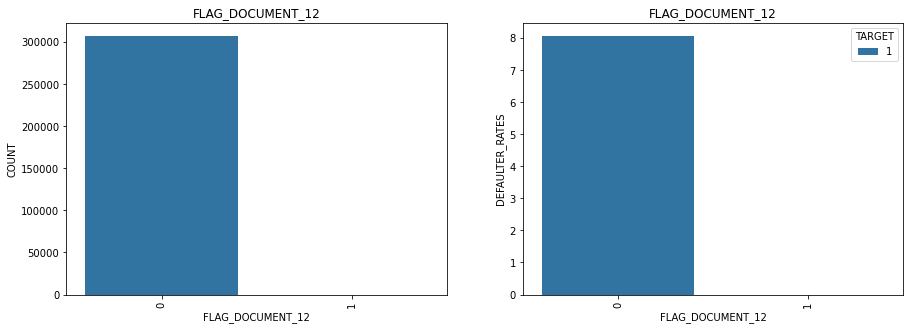

,FLAG_DOCUMENT_13,COUNT,TARGET,DEFAULTER_RATES
0,0,306427,1,8.091650
1,1,1084,1,2.767528


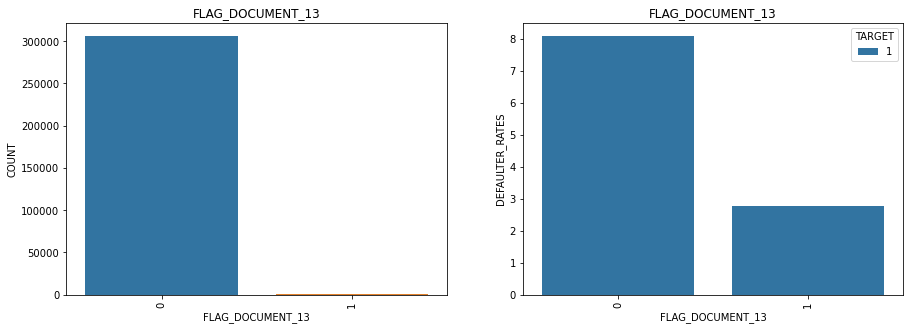

,FLAG_DOCUMENT_14,COUNT,TARGET,DEFAULTER_RATES
0,0,306608,1,8.086873
1,1,903,1,3.322259


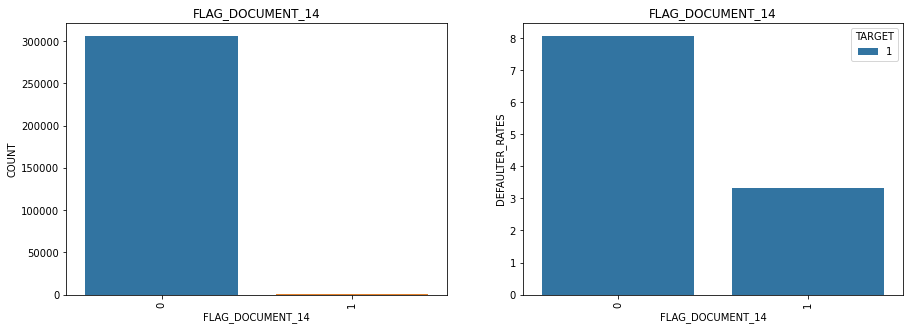

,FLAG_DOCUMENT_15,COUNT,TARGET,DEFAULTER_RATES
0,0,307139,1,8.079078
1,1,372,1,2.956989


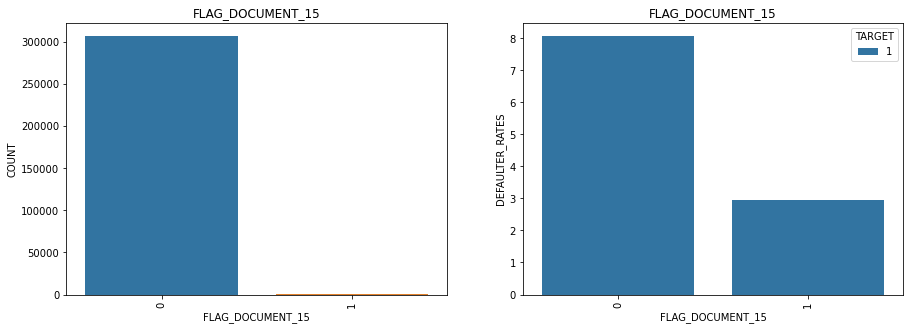

,FLAG_DOCUMENT_16,COUNT,TARGET,DEFAULTER_RATES
0,0,304458,1,8.104566
1,1,3053,1,4.913200


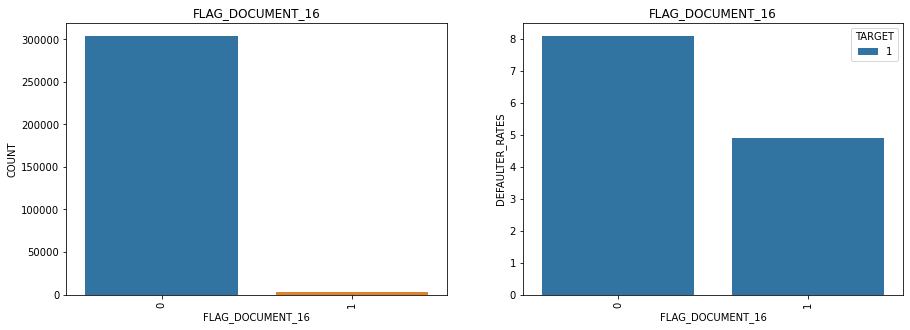

,FLAG_DOCUMENT_17,COUNT,TARGET,DEFAULTER_RATES
0,0,307429,1,8.074385
1,1,82,1,2.439024


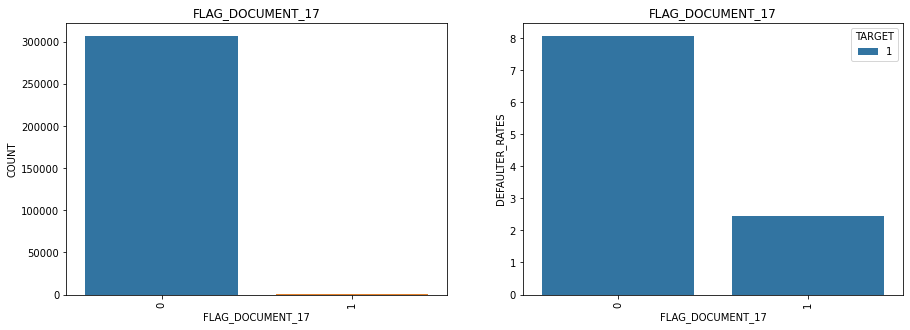

,FLAG_DOCUMENT_18,COUNT,TARGET,DEFAULTER_RATES
0,0,305011,1,8.092495
1,1,2500,1,5.680000


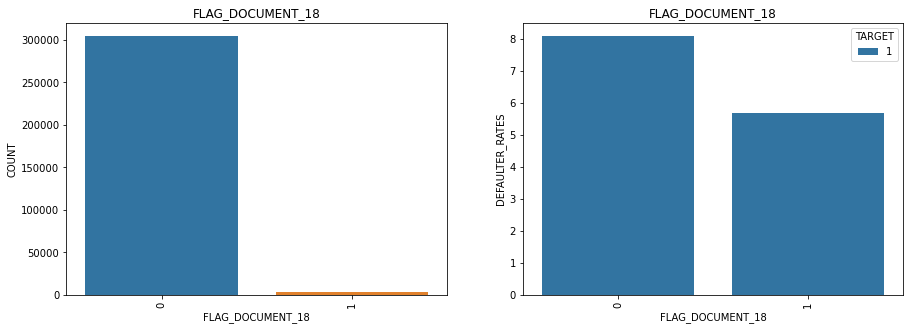

,FLAG_DOCUMENT_19,COUNT,TARGET,DEFAULTER_RATES
0,0,307328,1,8.073784
1,1,183,1,6.557377


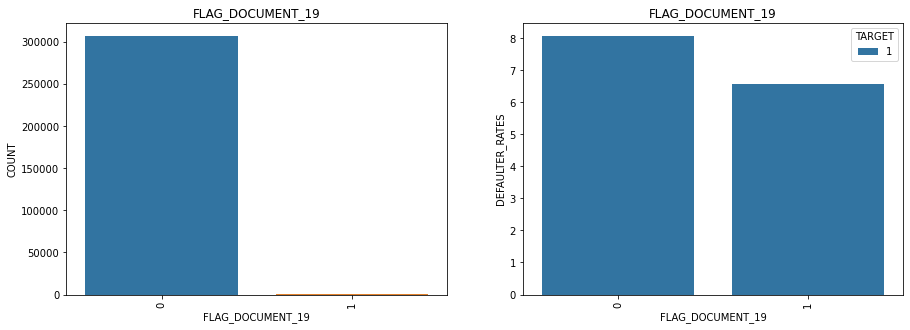

,FLAG_DOCUMENT_20,COUNT,TARGET,DEFAULTER_RATES
0,0,307355,1,8.072750
1,1,156,1,8.333333


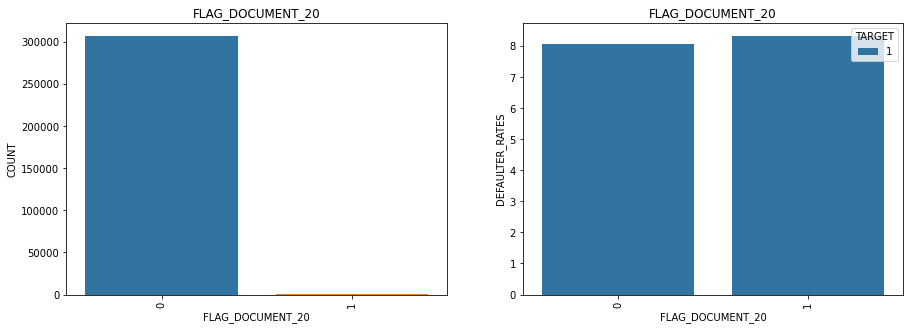

,FLAG_DOCUMENT_21,COUNT,TARGET,DEFAULTER_RATES
0,0,307408,1,8.071033
1,1,103,1,13.592233


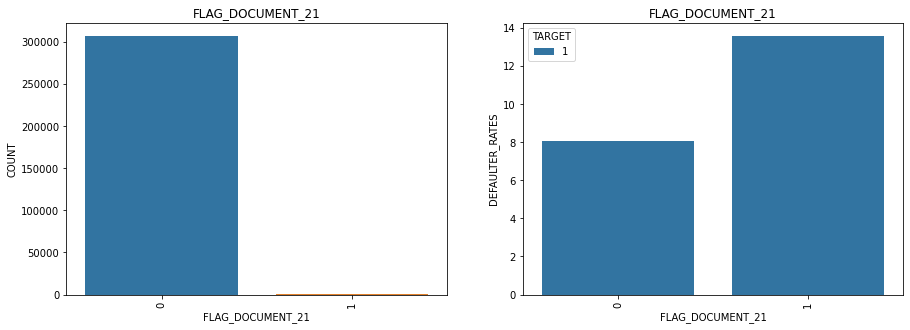

,AMT_REQ_CREDIT_BUREAU_HOUR,COUNT,TARGET,DEFAULTER_RATES
0,0.0,264366,1,7.717331
1,1.0,1560,1,8.012821
2,2.0,56,1,10.714286


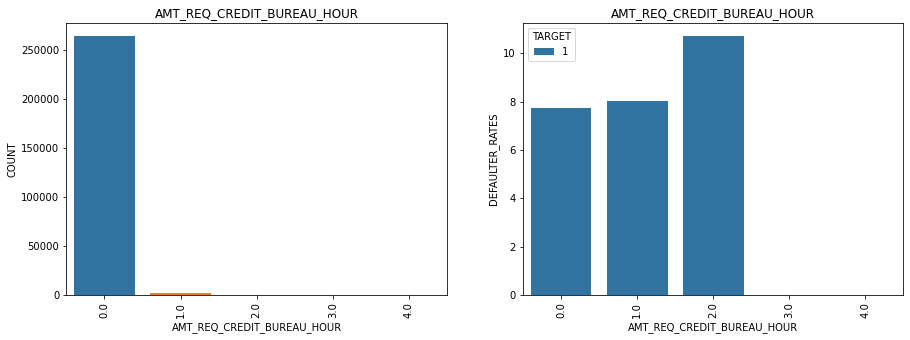

,AMT_REQ_CREDIT_BUREAU_DAY,COUNT,TARGET,DEFAULTER_RATES
0,0.0,264503,1,7.709553
1,1.0,1292,1,9.674923
2,2.0,106,1,10.377358
3,3.0,45,1,4.444444
4,4.0,26,1,11.538462


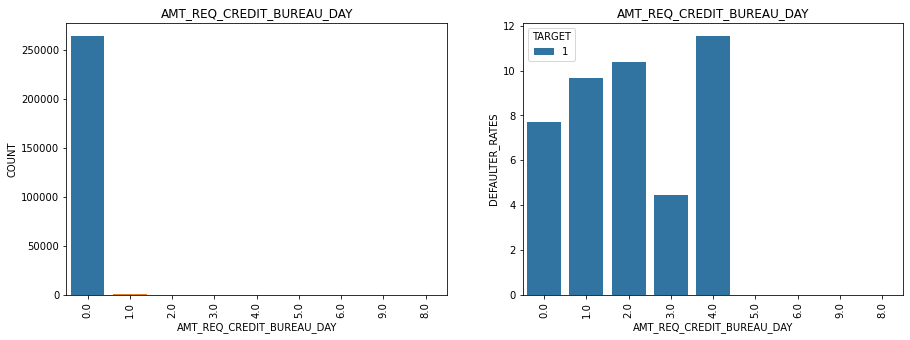

,AMT_REQ_CREDIT_BUREAU_WEEK,COUNT,TARGET,DEFAULTER_RATES
0,0.0,257456,1,7.715882
1,1.0,8208,1,7.772904
2,2.0,199,1,10.050251
3,3.0,58,1,6.896552
4,4.0,34,1,11.764706
5,6.0,20,1,5.000000
6,5.0,10,1,10.000000


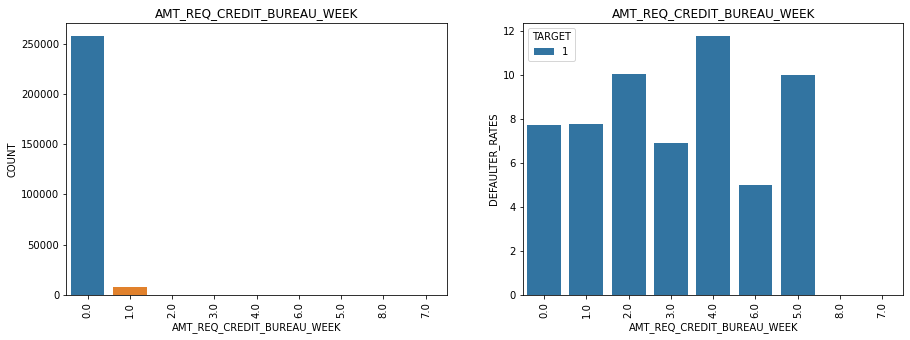

,AMT_REQ_CREDIT_BUREAU_QRT,COUNT,TARGET,DEFAULTER_RATES
0,0.0,215417,1,7.847570
1,1.0,33862,1,6.576694
2,2.0,14412,1,8.347211
3,3.0,1717,1,7.338381
4,4.0,476,1,11.974790
5,5.0,64,1,9.375000
6,6.0,28,1,25.000000
7,7.0,7,1,14.285714
8,19.0,1,1,100.000000


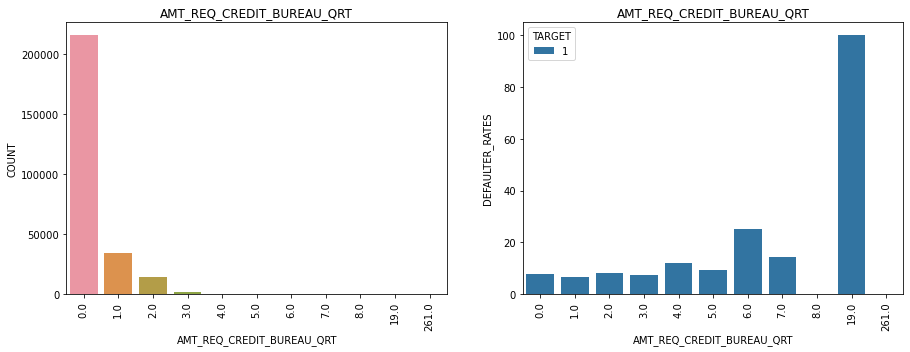

In [8]:
for col in cat.drop('TARGET'):
    a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
    a = a.rename(columns={'SK_ID_CURR':'COUNT'})
    a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    if(len(a)>25):
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(2,1,figsize=(15,20))
    else:
        defaulter_rates = a.merge(a_target,on=col)
        display(defaulter_rates)
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=col,y="COUNT",data=a,order=a[col],ax=ax[0])
    sns.barplot(x=col,y="DEFAULTER_RATES",hue="TARGET",data=a_target,order=a[col],ax=ax[1])
#     plt.title(col)
    ax[0].set_title(col)
    ax[1].set_title(col)
    ax[0].tick_params(axis='x',rotation=90)
    ax[1].tick_params(axis='x',rotation=90)
    plt.show()

In [27]:
application.groupby(['qbins']).count()[['SK_ID_CURR']].rename(columns={'SK_ID_CURR':'COUNT'})

,COUNT
qbins,
"(1615.499, 16524.0]",76893
"(16524.0, 24903.0]",76880
"(24903.0, 34596.0]",76962
"(34596.0, 258025.5]",76764


In [26]:
a_target = a_target.drop('TARGET',axis=1)
a_target['COUNT'] = application.groupby(['qbins']).count()[['SK_ID_CURR']].rename(columns={'SK_ID_CURR':'COUNT'}).reset_index()
a_target

,qbins,DEFAULTER_RATES,COUNT
3,"(270000.0, 513531.0]",9.683407,"(34596.0, 258025.5]"
5,"(513531.0, 808650.0]",9.161032,NaN
1,"(44999.999, 270000.0]",7.242958,"(16524.0, 24903.0]"
7,"(808650.0, 4050000.0]",6.214086,NaN


In [38]:
application.groupby(['qbins']).count()[['SK_ID_CURR']].rename(columns={'SK_ID_CURR':'COUNT'}).reset_index()

,qbins,COUNT
0,"(100001.999, 189145.5]",76878
1,"(189145.5, 278202.0]",76878
2,"(278202.0, 367142.5]",76877
3,"(367142.5, 456255.0]",76878


In [37]:
a_target['COUNT'] = application.groupby(['qbins']).count()[['SK_ID_CURR']].rename(columns={'SK_ID_CURR':'COUNT'}).reset_index()['COUNT']
a_target

,qbins,DEFAULTER_RATES,COUNT
3,"(189145.5, 278202.0]",8.284555,76878.0
1,"(100001.999, 189145.5]",8.028305,76878.0
5,"(278202.0, 367142.5]",8.012800,NaN
7,"(367142.5, 456255.0]",7.965868,NaN


,qbins,DEFAULTER_RATES,COUNT
3,"(189145.5, 278202.0]",8.284555,76878.0
1,"(100001.999, 189145.5]",8.028305,76878.0
5,"(278202.0, 367142.5]",8.012800,NaN
7,"(367142.5, 456255.0]",7.965868,NaN


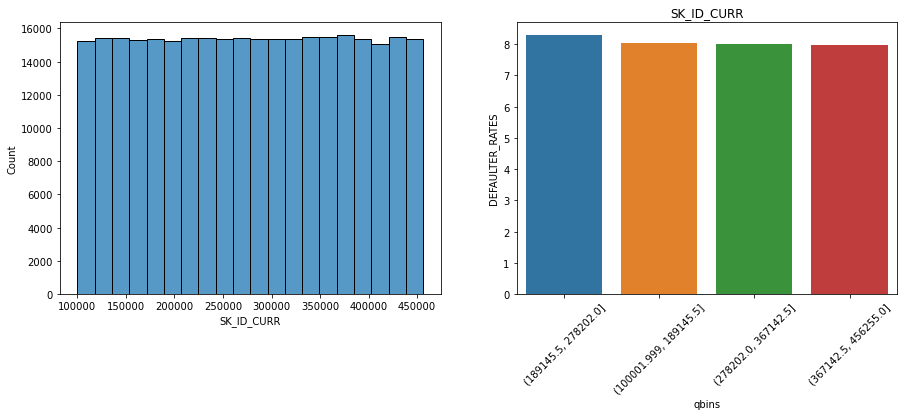

,qbins,DEFAULTER_RATES,COUNT
3,"(112500.0, 147150.0]",8.531082,71538.0
5,"(147150.0, 202500.0]",8.395266,NaN
1,"(25649.999, 112500.0]",8.394480,53182.0
7,"(202500.0, 117000000.0]",6.909614,NaN


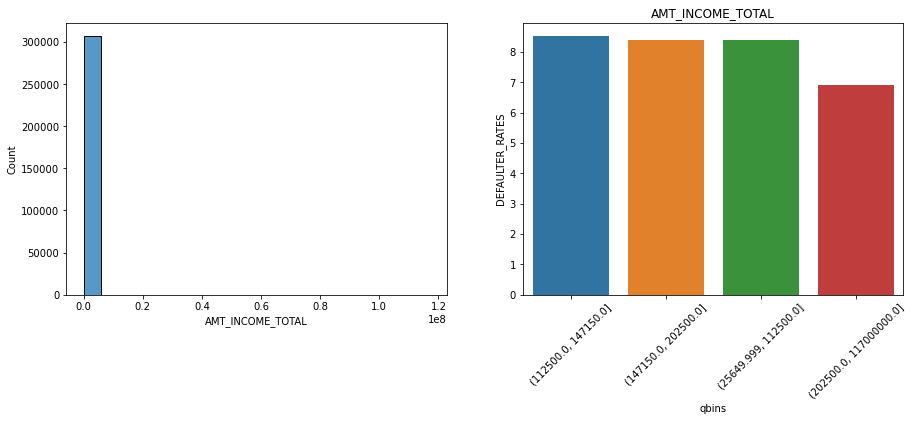

,qbins,DEFAULTER_RATES,COUNT
3,"(270000.0, 513531.0]",9.683407,75876.0
5,"(513531.0, 808650.0]",9.161032,NaN
1,"(44999.999, 270000.0]",7.242958,75428.0
7,"(808650.0, 4050000.0]",6.214086,NaN


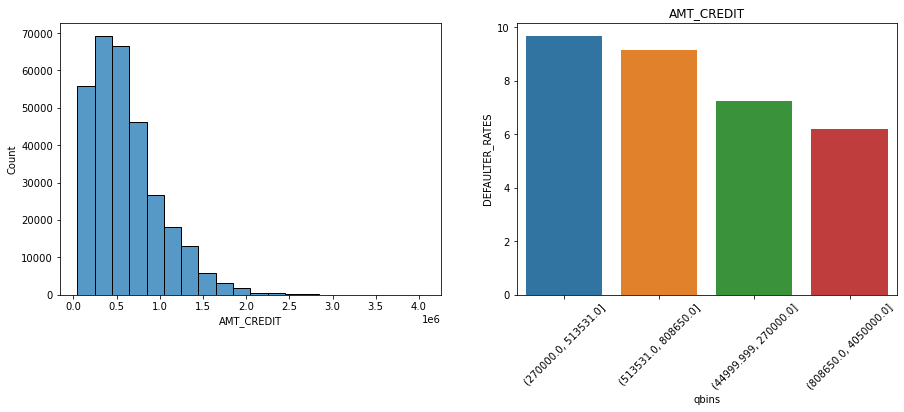

,qbins,DEFAULTER_RATES,COUNT
5,"(24903.0, 34596.0]",9.231829,NaN
3,"(16524.0, 24903.0]",8.753902,76764.0
7,"(34596.0, 258025.5]",7.242978,NaN
1,"(1615.499, 16524.0]",7.061761,76880.0


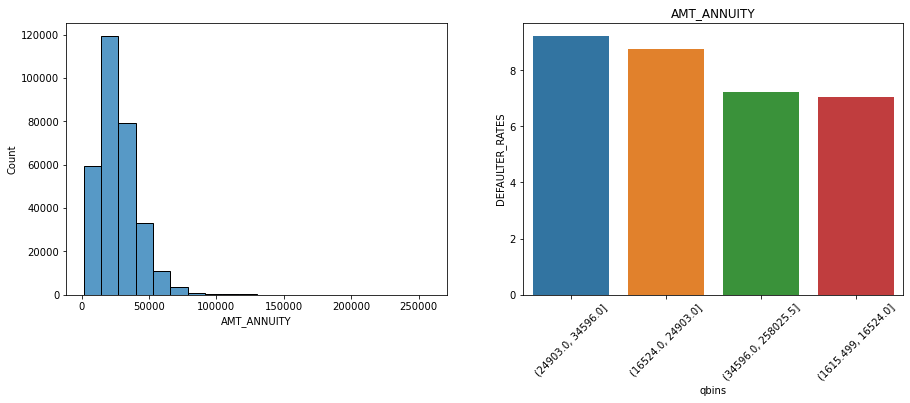

,qbins,DEFAULTER_RATES,COUNT
3,"(238500.0, 450000.0]",10.928017,75534.0
1,"(40499.999, 238500.0]",7.972257,78102.0
5,"(450000.0, 679500.0]",7.476940,NaN
7,"(679500.0, 4050000.0]",5.810628,NaN


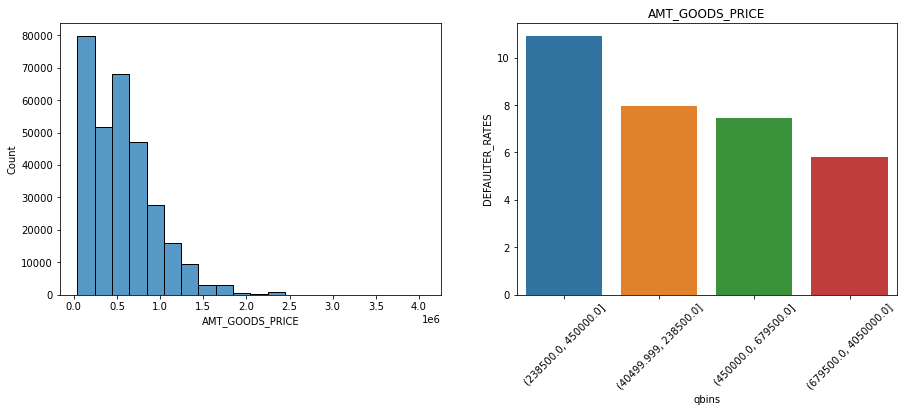

,qbins,DEFAULTER_RATES,COUNT
3,"(0.01, 0.0188]",8.687510,68382.0
1,"(-0.00071, 0.01]",8.618350,79033.0
5,"(0.0188, 0.0287]",8.423608,NaN
7,"(0.0287, 0.0725]",6.318914,NaN


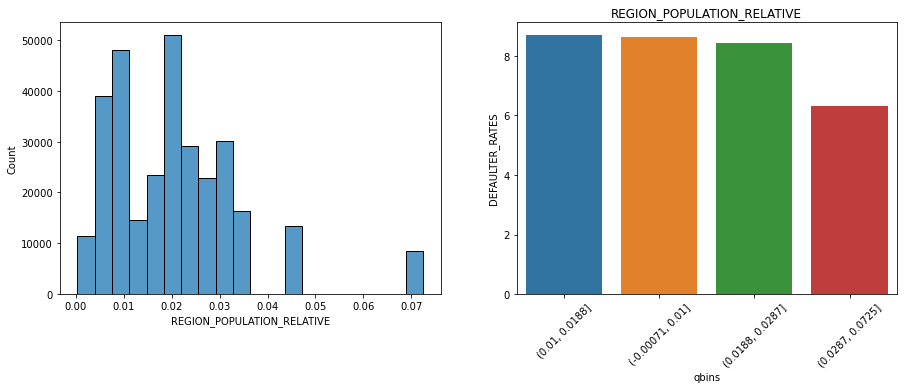

,qbins,DEFAULTER_RATES,COUNT
7,"(-12413.0, -7489.0]",10.995044,NaN
5,"(-15750.0, -12413.0]",8.659000,NaN
3,"(-19682.0, -15750.0]",7.324559,76871.0
1,"(-25229.001, -19682.0]",5.313476,76892.0


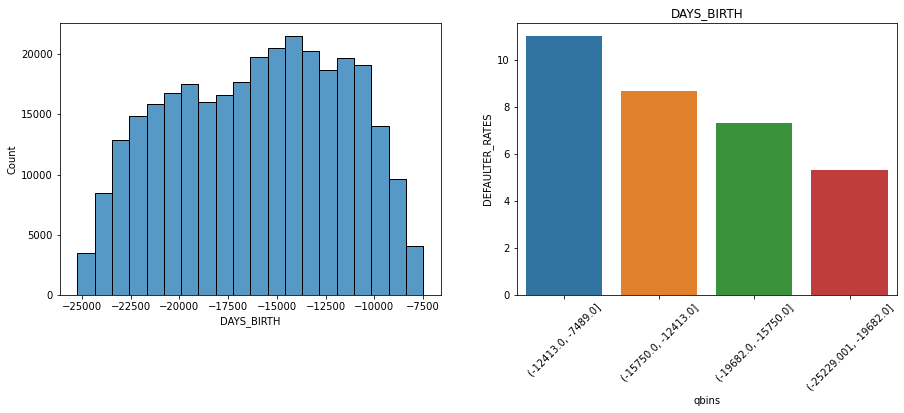

,qbins,DEFAULTER_RATES,COUNT
5,"(-1213.0, -289.0]",10.979147,NaN
3,"(-2760.0, -1213.0]",8.617081,76816.0
7,"(-289.0, 365243.0]",6.963393,NaN
1,"(-17912.001, -2760.0]",5.731747,76917.0


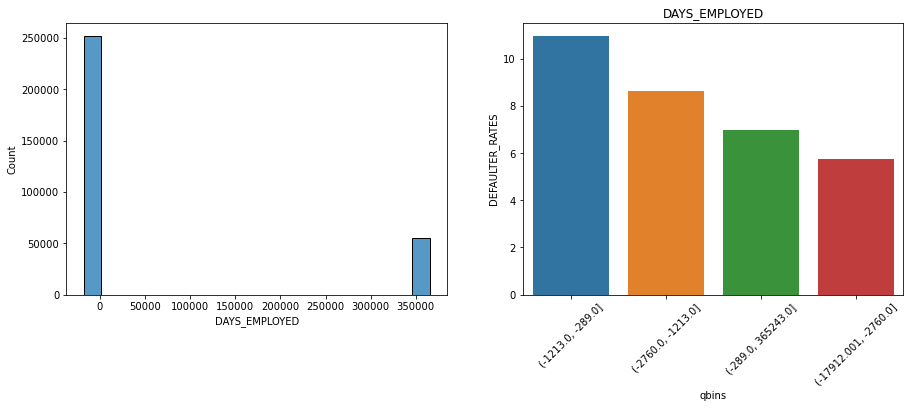

,qbins,DEFAULTER_RATES,COUNT
7,"(-2010.0, 0.0]",9.123665,NaN
5,"(-4504.0, -2010.0]",8.733494,NaN
3,"(-7479.5, -4504.0]",8.137493,76877.0
1,"(-24672.001, -7479.5]",6.296990,76891.0


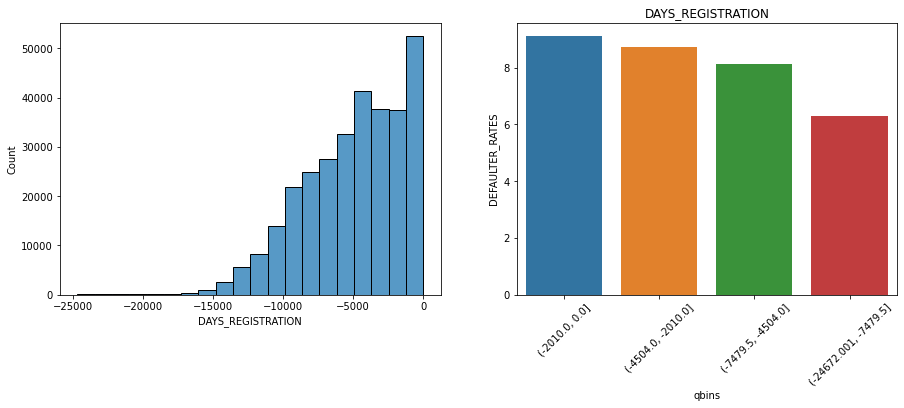

,qbins,DEFAULTER_RATES,COUNT
7,"(-1720.0, 0.0]",9.903734,NaN
5,"(-3254.0, -1720.0]",8.748162,NaN
3,"(-4299.0, -3254.0]",7.526756,76870.0
1,"(-7197.001, -4299.0]",6.114196,76899.0


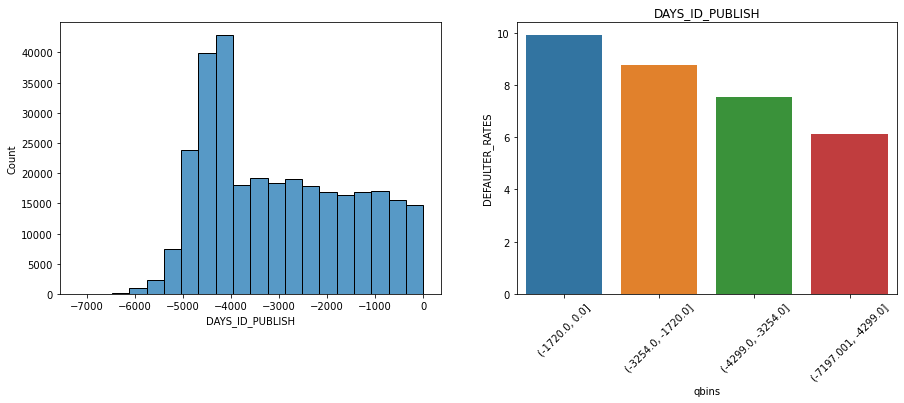

,qbins,DEFAULTER_RATES,COUNT
7,"(15.0, 91.0]",9.212884,NaN
5,"(9.0, 15.0]",8.126637,NaN
3,"(5.0, 9.0]",6.126330,25117.0
1,"(-0.001, 5.0]",5.689871,24713.0


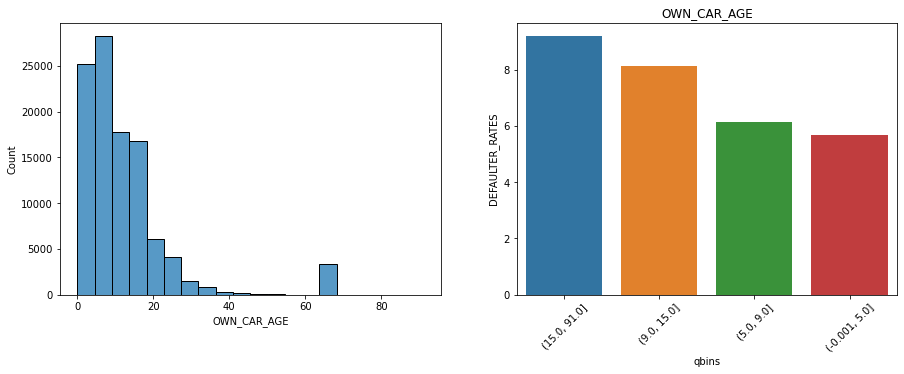

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.001, 10.0]",8.690482,71462.0
3,"(10.0, 12.0]",8.162380,74813.0
5,"(12.0, 14.0]",7.970533,NaN
7,"(14.0, 23.0]",7.220670,NaN


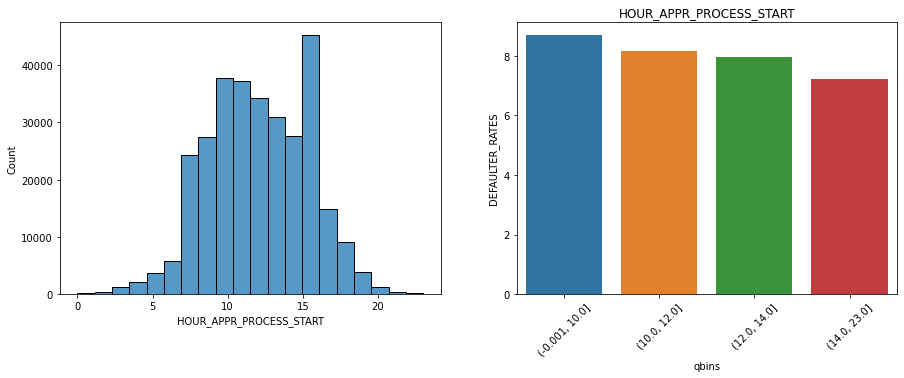

,qbins,DEFAULTER_RATES,COUNT
1,"(0.013600000000000001, 0.334]",13.559373,33534.0
3,"(0.334, 0.506]",7.771217,33533.0
5,"(0.506, 0.675]",5.379936,NaN
7,"(0.675, 0.963]",3.271404,NaN


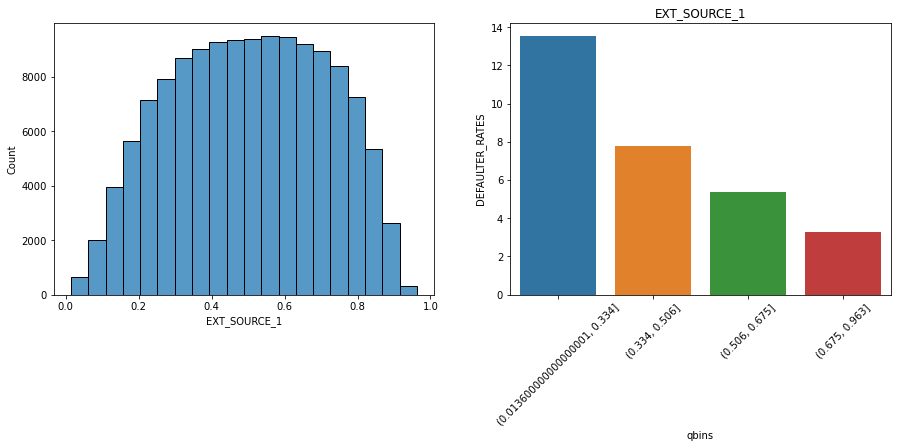

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.0009999183, 0.392]",14.294280,76710.0
3,"(0.392, 0.566]",8.174945,76712.0
5,"(0.566, 0.664]",6.019840,NaN
7,"(0.664, 0.855]",3.803838,NaN


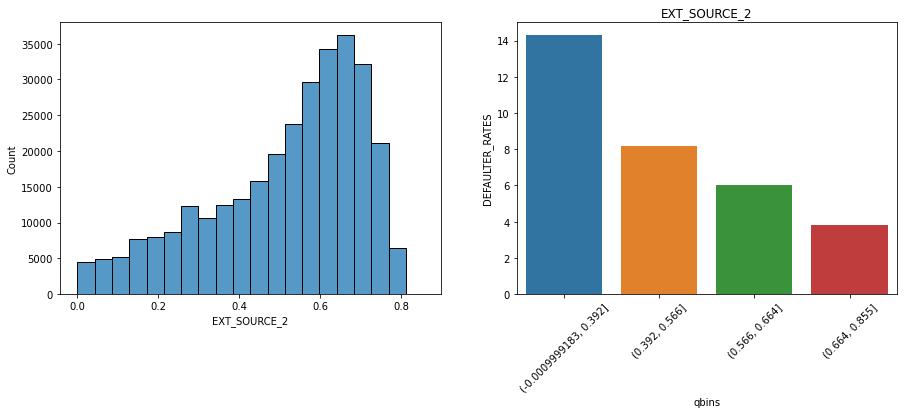

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.000473, 0.371]",15.056539,61384.0
3,"(0.371, 0.535]",7.510100,60991.0
5,"(0.535, 0.669]",4.913313,NaN
7,"(0.669, 0.896]",3.523471,NaN


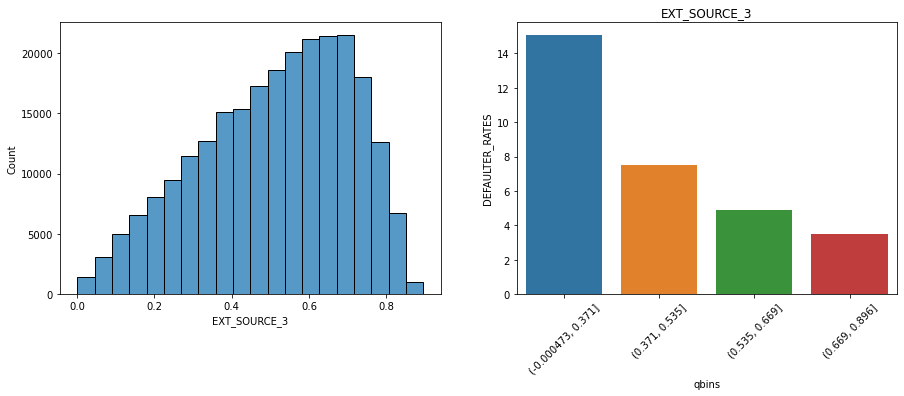

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.001, 0.0577]",8.417324,37747.0
3,"(0.0577, 0.0876]",6.805839,35290.0
5,"(0.0876, 0.148]",6.579868,NaN
7,"(0.148, 1.0]",5.967696,NaN


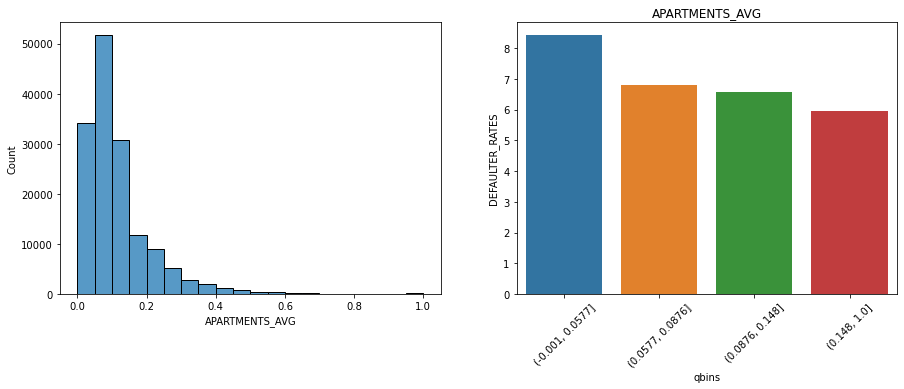

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.001, 0.0442]",7.636648,31904.0
3,"(0.0442, 0.0763]",7.061810,31839.0
5,"(0.0763, 0.112]",6.771160,NaN
7,"(0.112, 1.0]",6.080593,NaN


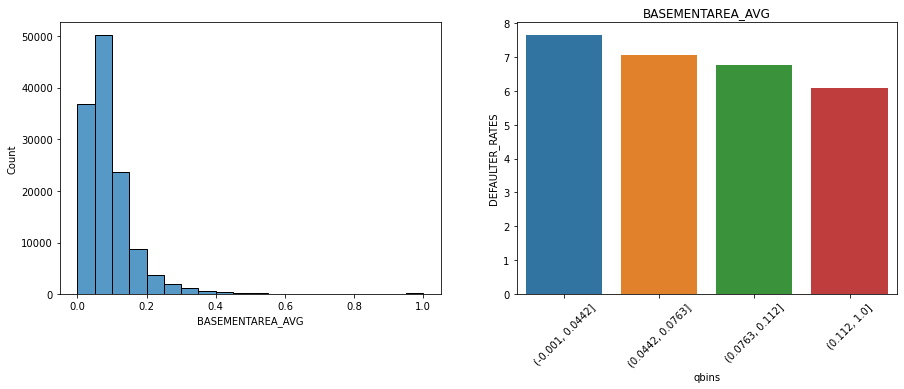

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.001, 0.977]",7.912342,38261.0
3,"(0.977, 0.982]",7.174407,38985.0
5,"(0.982, 0.987]",6.790404,NaN
7,"(0.987, 1.0]",6.069001,NaN


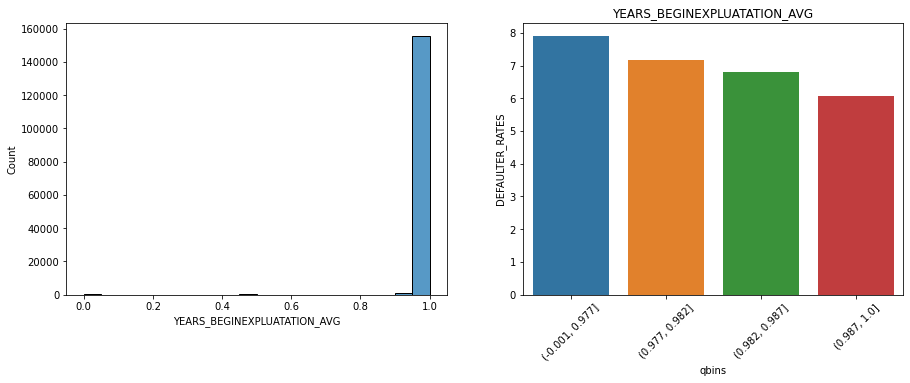

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.001, 0.687]",7.630084,25939.0
3,"(0.687, 0.755]",6.935503,23324.0
5,"(0.755, 0.823]",6.795188,NaN
7,"(0.823, 1.0]",6.002401,NaN


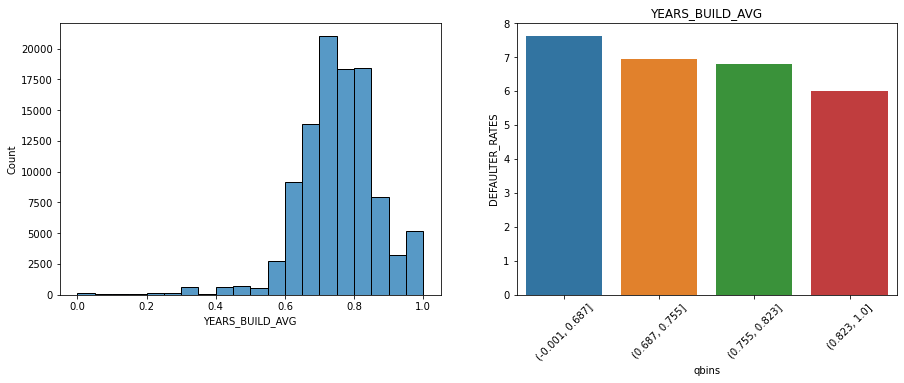

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.001, 0.0078]",7.422262,23213.0
3,"(0.0078, 0.0211]",7.138242,23128.0
5,"(0.0211, 0.0515]",6.869106,NaN
7,"(0.0515, 1.0]",6.208924,NaN


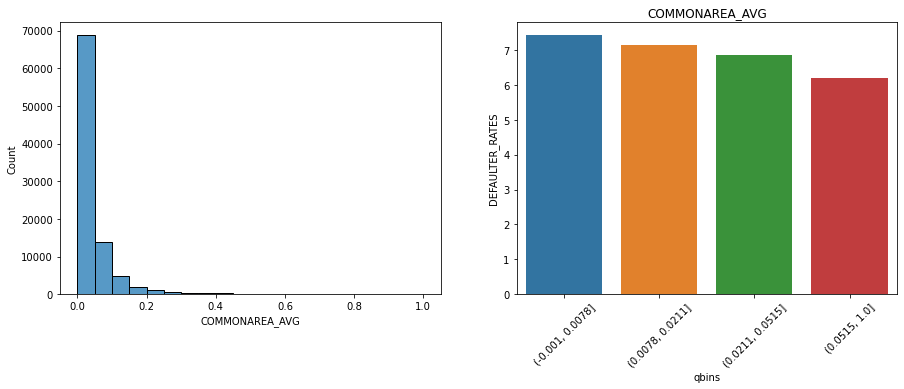

,qbins,DEFAULTER_RATES,COUNT
1,"(-0.001, 0.069]",7.979217,58844.0
3,"(0.069, 0.138]",6.884304,22391.0
5,"(0.138, 0.207]",6.292910,NaN
7,"(0.207, 1.0]",6.230182,NaN


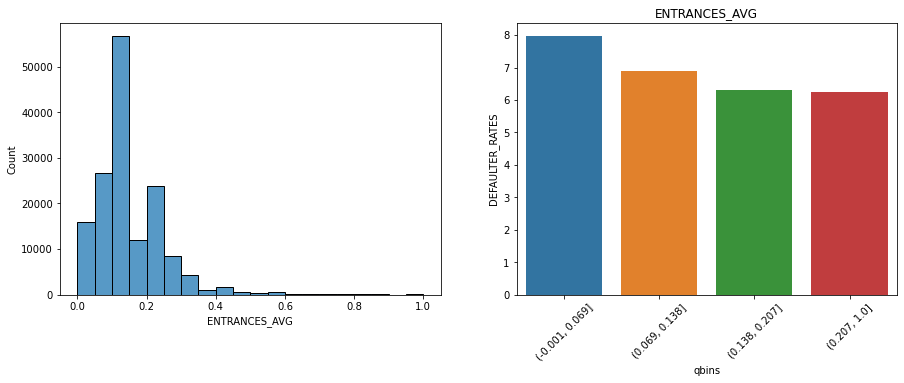

ValueError: Bin edges must be unique: array([0.    , 0.1667, 0.1667, 0.3333, 1.    ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

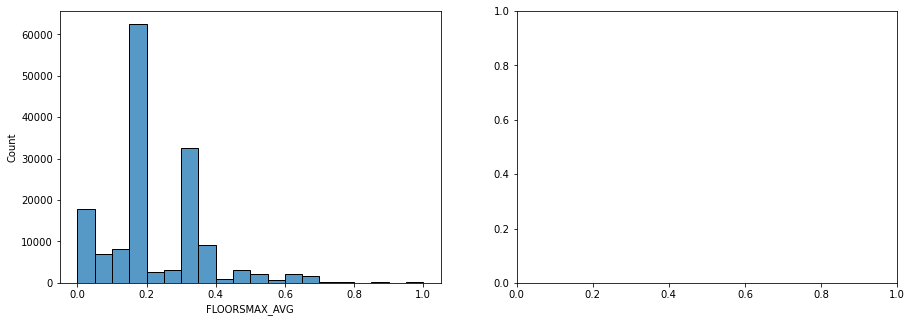

In [39]:
for col in num:
    fig,ax = plt.subplots(1,2,figsize=(15,5))
#     plt.figure(figsize=(10,5))
    sns.histplot(application[col],bins=20,ax=ax[0])
    plt.ticklabel_format(style='plain', axis='both')
    application['qbins'] = pd.qcut(application[col] , q=4)
    a_target = application.groupby(['qbins',"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    a_target = a_target.drop('TARGET',axis=1)
    a_target['COUNT'] = application.groupby(['qbins']).count()[['SK_ID_CURR']].rename(columns={'SK_ID_CURR':'COUNT'}).reset_index()['COUNT']
    display(a_target)
    sns.barplot(x='qbins',y="DEFAULTER_RATES",data=a_target,order=a_target['qbins'],ax=ax[1])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()